# Objetivo

Entender as relações entre as variáveis explicativas e as explicativas e a resposta. A ideia inicial é utilizar o pagamento como variável resposta.

# Pacotes e funções

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency

In [2]:
%run ../99.Funcoes_auxiliares/Funcoes.py

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Leitura da base de treino

In [4]:
dados_full = pd.read_parquet('../0.Avalia_Dados/Dados/treino.parquet')

In [5]:
# Colunas desconsideradas: id, documento, mes_pagamento, divida_restante, per_pago, genero
# Colunas desconsideradas momentaneamente para o problema de regressão: target

colunas_remove = ['id', 'documento', 'mes_pagamento', 'divida_restante', 'per_pago', 'GENERO', 'target']

dados_full.drop(columns=colunas_remove, inplace=True)

# Removendo duplicatas, se houver
dados_full.drop_duplicates(inplace=True)

In [6]:
dados_full.shape

(96109, 249)

In [7]:
dados_full.head(3)

,dias_atraso,segmento_veiculo,saldo_vencido,pagamento,IDADE,UF,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_7,VAR_8,VAR_9,VAR_11,VAR_12,VAR_15,VAR_17,VAR_18,VAR_21,VAR_22,VAR_23,VAR_25,VAR_32,VAR_33,VAR_34,VAR_35,VAR_40,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50,VAR_51,VAR_52,VAR_53,VAR_54,VAR_55,VAR_56,VAR_57,VAR_58,VAR_59,VAR_60,VAR_61,VAR_62,VAR_63,VAR_64,VAR_65,VAR_66,VAR_67,VAR_68,VAR_69,VAR_70,VAR_71,VAR_72,VAR_73,VAR_74,VAR_75,VAR_76,VAR_77,VAR_78,VAR_79,VAR_80,VAR_81,VAR_82,VAR_83,VAR_84,VAR_85,VAR_86,VAR_87,VAR_88,VAR_89,VAR_90,VAR_91,VAR_92,VAR_93,VAR_94,VAR_95,VAR_96,VAR_97,VAR_98,VAR_99,VAR_100,VAR_101,VAR_102,VAR_103,VAR_104,VAR_105,VAR_106,VAR_107,VAR_108,VAR_109,VAR_110,VAR_111,VAR_112,VAR_113,VAR_114,VAR_115,VAR_116,VAR_117,VAR_118,VAR_119,VAR_120,VAR_121,VAR_122,VAR_123,VAR_124,VAR_125,VAR_126,VAR_127,VAR_128,VAR_129,VAR_130,VAR_131,VAR_132,VAR_133,VAR_134,VAR_135,VAR_138,VAR_139,VAR_140,VAR_141,VAR_142,VAR_143,VAR_144,VAR_145,VAR_146,VAR_147,VAR_148,VAR_149,VAR_150,VAR_151,VAR_152,VAR_153,VAR_154,VAR_155,VAR_156,VAR_157,VAR_158,VAR_159,VAR_160,VAR_161,VAR_162,VAR_163,VAR_164,VAR_165,VAR_166,VAR_167,VAR_168,VAR_169,VAR_170,VAR_171,VAR_172,VAR_173,VAR_174,VAR_175,VAR_176,VAR_177,VAR_178,VAR_179,VAR_180,VAR_181,VAR_182,VAR_183,VAR_184,VAR_185,VAR_186,VAR_187,VAR_188,VAR_189,VAR_190,VAR_191,VAR_192,VAR_193,VAR_194,VAR_195,VAR_196,VAR_197,VAR_198,VAR_199,VAR_200,VAR_201,VAR_202,VAR_203,VAR_204,VAR_205,VAR_206,VAR_207,VAR_208,VAR_209,VAR_210,VAR_211,VAR_212,VAR_213,VAR_214,VAR_215,VAR_216,VAR_217,VAR_218,VAR_219,VAR_220,VAR_221,VAR_222,VAR_223,VAR_224,VAR_225,VAR_226,VAR_227,VAR_228,VAR_229,VAR_230,VAR_231,VAR_232,VAR_233,VAR_238,VAR_240,VAR_250,VAR_253,VAR_254,VAR_256,VAR_257,VAR_258,VAR_259,VAR_260,VAR_261,VAR_262,VAR_263,VAR_264,VAR_265,VAR_267,VAR_268,VAR_269,VAR_271,VAR_304,VAR_305,VAR_306,VAR_307,VAR_308,VAR_309,VAR_310,VAR_311,VAR_312,VAR_313,VAR_314,VAR_315
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
257349,87,leves,1966.20,0.0,22.721,None,None,None,None,NaN,0.112,NaN,NaN,1.583333,NaN,NaN,NaN,NaN,NaN,0.000,0.133,0.038,None,NaN,NaN,NaN,NaN,0.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1522.090503,E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.503700,34.207269,0.0,2.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,N,None,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None,None,NaN,NaN,None,None,NaN,F,1.0
257347,80,leves,6177.81,0.0,42.504,UF_7,D,E,MEDIA,1.0,0.744,0.208,0.205,0.500000,1.837035,3.039882,0.124,0.054,0.0,0.159,0.039,0.000,IMPOSTO A PAGAR,0.434656,0.560532,0.477024,NaN,0.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,BAIXISSIMA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTA,BAIXISSIMA,ALTISSIMA,MEDIO,PROXIMO,MEDIO,PROXIMO,PROXIMO,MEDIO,PROXIMO,MEDIO,MEDIO,LONGE,LONGE,MEDIO,MEDIO,MEDIO,LONGE,PROXIMO,PROXIMO,

In [8]:
# Somente as variáveis categóricas

dados_full.head().select_dtypes(include=['object']).columns

Index(['segmento_veiculo', 'UF', 'VAR_1', 'VAR_2', 'VAR_3', 'VAR_25', 'VAR_42',
       'VAR_43', 'VAR_44', 'VAR_45',
       ...
       'VAR_250', 'VAR_256', 'VAR_257', 'VAR_304', 'VAR_306', 'VAR_307',
       'VAR_308', 'VAR_311', 'VAR_312', 'VAR_314'],
      dtype='object', length=112)

In [6]:
# Para as variáveis categóricas sem informação, serão preenchidas com 'Sem_Info'

cat = dados_full.select_dtypes(include=['object'])
cat = cat.fillna('Sem_Info')
cat.head(3)

,segmento_veiculo,UF,VAR_1,VAR_2,VAR_3,VAR_25,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50,VAR_51,VAR_52,VAR_53,VAR_54,VAR_55,VAR_56,VAR_57,VAR_58,VAR_59,VAR_60,VAR_61,VAR_62,VAR_63,VAR_64,VAR_65,VAR_66,VAR_67,VAR_68,VAR_69,VAR_70,VAR_71,VAR_72,VAR_73,VAR_74,VAR_75,VAR_76,VAR_77,VAR_78,VAR_79,VAR_80,VAR_81,VAR_82,VAR_83,VAR_84,VAR_85,VAR_86,VAR_87,VAR_88,VAR_89,VAR_90,VAR_91,VAR_92,VAR_93,VAR_94,VAR_95,VAR_96,VAR_97,VAR_98,VAR_99,VAR_100,VAR_101,VAR_102,VAR_103,VAR_104,VAR_105,VAR_106,VAR_107,VAR_108,VAR_109,VAR_110,VAR_111,VAR_112,VAR_113,VAR_114,VAR_115,VAR_116,VAR_117,VAR_118,VAR_119,VAR_120,VAR_121,VAR_122,VAR_123,VAR_124,VAR_125,VAR_126,VAR_127,VAR_128,VAR_129,VAR_130,VAR_131,VAR_132,VAR_133,VAR_135,VAR_233,VAR_238,VAR_240,VAR_250,VAR_256,VAR_257,VAR_304,VAR_306,VAR_307,VAR_308,VAR_311,VAR_312,VAR_314
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
257349,leves,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,E,Sem_Info,Sem_Info,Sem_Info,Sem_Info,N,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,F
257347,leves,UF_7,D,E,MEDIA,IMPOSTO A PAGAR,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,BAIXISSIMA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTA,BAIXISSIMA,ALTISSIMA,MEDIO,PROXIMO,MEDIO,PROXIMO,PROXIMO,MEDIO,PROXIMO,MEDIO,MEDIO,LONGE,LONGE,MEDIO,MEDIO,MEDIO,LONGE,PROXIMO,PROXIMO,LONGE,MUITO LONGE,MEDIO,PROXIMO,MEDIO,MEDIO,MEDIO,PROXIMO,PROXIMO,MEDIO,MEDIO,MEDIO,MUITO PROXIMO,MEDIO,MEDIO,MEDIO,LONGE,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,D,S,N,N,S,N,N,PROXIMO,PROXIMO,LONGE,PROXIMO,URBANO,SUL,A
257375,leves,UF_12,Sem_Info,E,ALTISSIMA,Sem_Info,S,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,BAIXISSIMA,BAIXISSIMA,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO PROXIMO,MUITO LONGE,MUITO LONGE,LONGE,MUITO LONGE,LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,MUITO LONGE,MUITO LONGE,LONGE,LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO PROXIMO,LONGE,LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,E,Sem_Info,Sem_Info,Sem_Info,Sem_Info,N,Sem_Info,MUITO LONGE,PROXIMO,LONGE,MEDIO,RURAL,NORDESTE,F


In [7]:
cat.shape

(96109, 112)

In [ ]:
# Categóricas nominais

cat[['segmento_veiculo', 'UF', 'VAR_25', 'VAR_311', 'VAR_312', 'VAR_42', 'VAR_43', 'VAR_44', 'VAR_45', 'VAR_46', 'VAR_47', 'VAR_48', 'VAR_49', 'VAR_50', 'VAR_51', 
     'VAR_52', 'VAR_53', 'VAR_54', 'VAR_55', 'VAR_56', 'VAR_57', 'VAR_58', 'VAR_233', 'VAR_238', 'VAR_240', 'VAR_250', 'VAR_256', 'VAR_257']].head()

,segmento_veiculo,UF,VAR_25,VAR_311,VAR_312,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50,VAR_51,VAR_52,VAR_53,VAR_54,VAR_55,VAR_56,VAR_57,VAR_58,VAR_233,VAR_238,VAR_240,VAR_250,VAR_256,VAR_257
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
257349,leves,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,N,Sem_Info
257347,leves,UF_7,IMPOSTO A PAGAR,URBANO,SUL,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,S,N,N,S,N,N
257375,leves,UF_12,Sem_Info,RURAL,NORDESTE,S,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Sem_Info,Sem_Info,Sem_Info,Sem_Info,N,Sem_Info
74,motos,UF_7,DECLARACAO NAO ENVIADA,URBANO,SUL,S,S,N,N,N,N,N,N,N,N,N,N,S,N,N,N,N,S,N,N,S,N,N
172143,motos,UF_11,DECLARACAO NAO ENVIADA,URBANO,SUDESTE,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,S,N,N,S,N,N


In [ ]:
# Categóricas ordinais 1

cat[['VAR_1', 'VAR_2', 'VAR_314', 'VAR_135', 'VAR_3', 'VAR_59', 'VAR_60', 'VAR_61', 'VAR_62', 'VAR_63', 'VAR_64', 'VAR_65', 'VAR_66', 'VAR_67', 'VAR_68', 'VAR_69', 'VAR_70', 
     'VAR_71', 'VAR_72', 'VAR_73', 'VAR_74', 'VAR_75', 'VAR_76', 'VAR_77', 'VAR_78', 'VAR_79', 'VAR_80', 'VAR_81', 'VAR_82', 'VAR_83', 'VAR_84', 
     'VAR_85', 'VAR_86', 'VAR_87', 'VAR_88', 'VAR_89', 'VAR_90', 'VAR_91', 'VAR_92', 'VAR_93', 'VAR_94']].head()

,VAR_1,VAR_2,VAR_314,VAR_135,VAR_3,VAR_59,VAR_60,VAR_61,VAR_62,VAR_63,VAR_64,VAR_65,VAR_66,VAR_67,VAR_68,VAR_69,VAR_70,VAR_71,VAR_72,VAR_73,VAR_74,VAR_75,VAR_76,VAR_77,VAR_78,VAR_79,VAR_80,VAR_81,VAR_82,VAR_83,VAR_84,VAR_85,VAR_86,VAR_87,VAR_88,VAR_89,VAR_90,VAR_91,VAR_92,VAR_93,VAR_94
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
257349,Sem_Info,Sem_Info,F,E,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info
257347,D,E,A,D,MEDIA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,ALTISSIMA,BAIXISSIMA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTA,BAIXISSIMA,ALTISSIMA
257375,Sem_Info,E,F,E,ALTISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,BAIXISSIMA,BAIXISSIMA
74,E,E,B,E,MEDIA,ALTA,BAIXISSIMA,MEDIA,BAIXISSIMA,ALTA,ALTA,MEDIA,ALTA,MEDIA,MEDIA,ALTA,MEDIA,ALTISSIMA,ALTA,ALTA,ALTA,BAIXISSIMA,ALTA,BAIXISSIMA,ALTA,ALTA,ALTA,MEDIA,ALTA,BAIXISSIMA,ALTA,ALTA,ALTA,ALTA,ALTA,ALTA,MEDIA,MEDIA,MEDIA,BAIXISSIMA,ALTA
172143,E,E,E,E,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,MEDIA,MEDIA,ALTA,BAIXISSIMA,BAIXISSIMA,MEDIA,MEDIA,ALTA,MEDIA,MEDIA,MEDIA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,ALTA,MEDIA,MEDIA,BAIXA,ALTA,MEDIA,BAIXISSIMA,MEDIA,ALTA,ALTA,MEDIA,BAIXISSIMA,MEDIA,MEDIA,MEDIA,MEDIA,ALTISSIMA,MEDIA


In [9]:
# Categóricas ordinais 2

cat[['VAR_95', 'VAR_96', 'VAR_97', 'VAR_98', 'VAR_99', 'VAR_100', 'VAR_101', 'VAR_102', 'VAR_103', 'VAR_104', 'VAR_105', 'VAR_106', 'VAR_107', 'VAR_108', 
     'VAR_109', 'VAR_110', 'VAR_111', 'VAR_112', 'VAR_113', 'VAR_114', 'VAR_115', 'VAR_116', 'VAR_117', 'VAR_118', 'VAR_119', 'VAR_120', 'VAR_121', 
     'VAR_122', 'VAR_123', 'VAR_124', 'VAR_125', 'VAR_126', 'VAR_127', 'VAR_128', 'VAR_129', 'VAR_130', 'VAR_131', 'VAR_132', 'VAR_133',
     'VAR_304', 'VAR_306', 'VAR_307', 'VAR_308']].head()

,VAR_95,VAR_96,VAR_97,VAR_98,VAR_99,VAR_100,VAR_101,VAR_102,VAR_103,VAR_104,VAR_105,VAR_106,VAR_107,VAR_108,VAR_109,VAR_110,VAR_111,VAR_112,VAR_113,VAR_114,VAR_115,VAR_116,VAR_117,VAR_118,VAR_119,VAR_120,VAR_121,VAR_122,VAR_123,VAR_124,VAR_125,VAR_126,VAR_127,VAR_128,VAR_129,VAR_130,VAR_131,VAR_132,VAR_133,VAR_304,VAR_306,VAR_307,VAR_308
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
257349,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info
257347,MEDIO,PROXIMO,MEDIO,PROXIMO,PROXIMO,MEDIO,PROXIMO,MEDIO,MEDIO,LONGE,LONGE,MEDIO,MEDIO,MEDIO,LONGE,PROXIMO,PROXIMO,LONGE,MUITO LONGE,MEDIO,PROXIMO,MEDIO,MEDIO,MEDIO,PROXIMO,PROXIMO,MEDIO,MEDIO,MEDIO,MUITO PROXIMO,MEDIO,MEDIO,MEDIO,LONGE,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,PROXIMO,PROXIMO,LONGE,PROXIMO
257375,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO PROXIMO,MUITO LONGE,MUITO LONGE,LONGE,MUITO LONGE,LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,MUITO LONGE,MUITO LONGE,LONGE,LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO PROXIMO,LONGE,LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,PROXIMO,LONGE,MEDIO
74,LONGE,MEDIO,PROXIMO,LONGE,LONGE,LONGE,LONGE,LONGE,MEDIO,LONGE,LONGE,LONGE,LONGE,LONGE,LONGE,LONGE,LONGE,LONGE,MUITO LONGE,MUITO LONGE,LONGE,LONGE,MEDIO,LONGE,MEDIO,MUITO LONGE,PROXIMO,LONGE,MEDIO,LONGE,LONGE,LONGE,LONGE,PROXIMO,MEDIO,MEDIO,MEDIO,LONGE,MUITO LONGE,MEDIO,MEDIO,LONGE,LONGE
172143,LONGE,LONGE,LONGE,LONGE,LONGE,LONGE,MEDIO,LONGE,LONGE,MEDIO,MEDIO,MEDIO,PROXIMO,MEDIO,LONGE,LONGE,MEDIO,PROXIMO,MUITO LONGE,MEDIO,LONGE,MEDIO,MUITO LONGE,MEDIO,LONGE,MUITO LONGE,LONGE,MEDIO,PROXIMO,MEDIO,LONGE,LONGE,LONGE,LONGE,PROXIMO,LONGE,LONGE,LONGE,LONGE,MEDIO,MEDIO,MEDIO,PROXIMO


In [11]:
# Tabelas de frequências das variáveis categóricas
    # Variáveis categóricas com mais de 85% dos valores concentrados em um nível serão desconsideradas: 
    # VAR_2, VAR_42, VAR_44, VAR_45, VAR_46, VAR_47, VAR_48, VAR_50, VAR_51, VAR_52, VAR_53, VAR_55, VAR_56, VAR_57, VAR_113, VAR_256

for i in cat.columns:
    print('===================================')
    print(i)
    print(conta_categorias(variavel=i, df = cat, dropna=True)[1])

segmento_veiculo
  segmento_veiculo      count
0            leves  70.617736
1            motos  29.382264
UF
       UF      count
0    UF_0  33.166509
1    UF_7   7.783870
2    UF_8   7.270911
3   UF_15   5.542665
4   UF_21   5.043232
5    UF_5   4.190034
6   UF_13   3.259840
7    UF_1   3.234869
8   UF_12   3.118334
9   UF_17   3.062148
10   UF_9   2.772893
11  UF_16   2.750003
12   UF_3   2.521096
13  UF_14   2.472193
14   UF_4   1.731368
15   UF_6   1.694951
16  UF_11   1.096671
17  UF_23   0.936437
18   UF_2   0.893777
19  UF_19   0.767878
20  UF_24   0.639898
21  UF_22   0.552498
22  UF_20   0.521283
23  UF_25   0.506716
24  UF_18   0.417235
25  UF_10   0.353765
26  UF_26   0.099887
VAR_1
  VAR_1      count
0     E  55.246647
1     D  16.578052
2     C   4.527151
3     B   0.456773
4     A   0.187287
VAR_2
  VAR_2      count
0     E  94.274209
1     C   1.114360
2     D   0.987421
3     B   0.071793
4     A   0.008324
VAR_3
        VAR_3      count
0       MEDIA  42.715042
1   AL

In [7]:
# Aplicação do teste do qui-quadrado para verificar a independência entre as variáveis categóricas

colunas = cat.columns
colunas = colunas.drop(['VAR_2', 'VAR_42', 'VAR_44', 'VAR_45', 'VAR_46', 'VAR_47', 'VAR_48', 'VAR_50', 'VAR_51', 'VAR_52', 'VAR_53', 'VAR_55', 'VAR_56', 'VAR_57', 'VAR_113', 'VAR_256'])

# Variáveis a serem retiradas por estarem correlacionadas

vars_retirar = []

for i in range(0,len(colunas)):
    for j in range(i+1,len(colunas)):
        
        # print(colunas[i], '+', colunas[j])

        # Variável auxiliar para a tabela de contingência
        aux = pd.crosstab(cat[colunas[i]], cat[colunas[j]], margins=True)
        
        # Teste do qui-quadrado: teste de independência
        chi, p, dof, expected = chi2_contingency(aux)
        # print(p)

        if p < 0.05:
            
            vars_retirar.append(colunas[j])
            print(colunas[i], '+', colunas[j])
            print('Rejeita H0, ou seja, não há evidência suficientes para afirmar que as variáveis são não correlacionadas.')
            print('\n')
            print('====================================')

segmento_veiculo + UF
Rejeita H0, ou seja, não há evidência suficientes para afirmar que as variáveis são não correlacionadas.


segmento_veiculo + VAR_1
Rejeita H0, ou seja, não há evidência suficientes para afirmar que as variáveis são não correlacionadas.


segmento_veiculo + VAR_3
Rejeita H0, ou seja, não há evidência suficientes para afirmar que as variáveis são não correlacionadas.


segmento_veiculo + VAR_25
Rejeita H0, ou seja, não há evidência suficientes para afirmar que as variáveis são não correlacionadas.


segmento_veiculo + VAR_43
Rejeita H0, ou seja, não há evidência suficientes para afirmar que as variáveis são não correlacionadas.


segmento_veiculo + VAR_49
Rejeita H0, ou seja, não há evidência suficientes para afirmar que as variáveis são não correlacionadas.


segmento_veiculo + VAR_54
Rejeita H0, ou seja, não há evidência suficientes para afirmar que as variáveis são não correlacionadas.


segmento_veiculo + VAR_58
Rejeita H0, ou seja, não há evidência suficientes

In [ ]:
# Variáveis que podem ser retiradas por estarem correlacionadas

vars_retirar = list(set(vars_retirar))
vars_retirar

['VAR_73',
 'VAR_83',
 'VAR_71',
 'VAR_112',
 'VAR_91',
 'VAR_129',
 'VAR_240',
 'VAR_314',
 'VAR_115',
 'VAR_99',
 'VAR_312',
 'VAR_3',
 'VAR_98',
 'VAR_117',
 'VAR_108',
 'VAR_131',
 'VAR_133',
 'VAR_257',
 'VAR_54',
 'VAR_105',
 'VAR_116',
 'VAR_118',
 'VAR_61',
 'VAR_250',
 'VAR_121',
 'VAR_66',
 'VAR_1',
 'VAR_67',
 'VAR_106',
 'VAR_100',
 'VAR_311',
 'VAR_110',
 'VAR_68',
 'VAR_86',
 'VAR_127',
 'VAR_107',
 'VAR_84',
 'VAR_75',
 'VAR_122',
 'VAR_132',
 'VAR_101',
 'VAR_96',
 'VAR_60',
 'VAR_88',
 'VAR_97',
 'VAR_104',
 'VAR_304',
 'VAR_307',
 'VAR_79',
 'VAR_308',
 'VAR_78',
 'VAR_90',
 'VAR_119',
 'UF',
 'VAR_94',
 'VAR_70',
 'VAR_95',
 'VAR_109',
 'VAR_102',
 'VAR_130',
 'VAR_92',
 'VAR_25',
 'VAR_124',
 'VAR_80',
 'VAR_63',
 'VAR_306',
 'VAR_87',
 'VAR_82',
 'VAR_126',
 'VAR_120',
 'VAR_58',
 'VAR_111',
 'VAR_72',
 'VAR_76',
 'VAR_62',
 'VAR_81',
 'VAR_49',
 'VAR_64',
 'VAR_77',
 'VAR_74',
 'VAR_85',
 'VAR_89',
 'VAR_135',
 'VAR_103',
 'VAR_59',
 'VAR_93',
 'VAR_43',
 'VAR_128

In [9]:
len(vars_retirar)

95

In [13]:
cat.drop(columns=vars_retirar).head()

,segmento_veiculo,VAR_2,VAR_42,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_50,VAR_51,VAR_52,VAR_53,VAR_55,VAR_56,VAR_57,VAR_113,VAR_256
index,,,,,,,,,,,,,,,,,
257349,leves,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,N
257347,leves,E,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,Sem_Info,MUITO LONGE,N
257375,leves,E,S,N,N,N,N,N,N,N,N,N,N,N,N,MUITO LONGE,N
74,motos,E,S,N,N,N,N,N,N,N,N,N,N,N,N,MUITO LONGE,N
172143,motos,E,N,N,N,N,N,N,N,N,N,N,N,N,N,MUITO LONGE,N


In [7]:
# Somente as variáveis numéricas

num = dados_full.head().select_dtypes(exclude=['object'])
num.head()

,dias_atraso,saldo_vencido,pagamento,IDADE,VAR_4,VAR_5,VAR_7,VAR_8,VAR_9,VAR_11,VAR_12,VAR_15,VAR_17,VAR_18,VAR_21,VAR_22,VAR_23,VAR_32,VAR_33,VAR_34,VAR_35,VAR_40,VAR_134,VAR_138,VAR_139,VAR_140,VAR_141,VAR_142,VAR_143,VAR_144,VAR_145,VAR_146,VAR_147,VAR_148,VAR_149,VAR_150,VAR_151,VAR_152,VAR_153,VAR_154,VAR_155,VAR_156,VAR_157,VAR_158,VAR_159,VAR_160,VAR_161,VAR_162,VAR_163,VAR_164,VAR_165,VAR_166,VAR_167,VAR_168,VAR_169,VAR_170,VAR_171,VAR_172,VAR_173,VAR_174,VAR_175,VAR_176,VAR_177,VAR_178,VAR_179,VAR_180,VAR_181,VAR_182,VAR_183,VAR_184,VAR_185,VAR_186,VAR_187,VAR_188,VAR_189,VAR_190,VAR_191,VAR_192,VAR_193,VAR_194,VAR_195,VAR_196,VAR_197,VAR_198,VAR_199,VAR_200,VAR_201,VAR_202,VAR_203,VAR_204,VAR_205,VAR_206,VAR_207,VAR_208,VAR_209,VAR_210,VAR_211,VAR_212,VAR_213,VAR_214,VAR_215,VAR_216,VAR_217,VAR_218,VAR_219,VAR_220,VAR_221,VAR_222,VAR_223,VAR_224,VAR_225,VAR_226,VAR_227,VAR_228,VAR_229,VAR_230,VAR_231,VAR_232,VAR_253,VAR_254,VAR_258,VAR_259,VAR_260,VAR_261,VAR_262,VAR_263,VAR_264,VAR_265,VAR_267,VAR_268,VAR_269,VAR_271,VAR_305,VAR_309,VAR_310,VAR_313,VAR_315
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
257349,87,1966.20,0.00,22.721,NaN,0.112,NaN,NaN,1.583333,NaN,NaN,NaN,NaN,NaN,0.000,0.133,0.038,NaN,NaN,NaN,NaN,0.000,1522.090503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.503700,34.207269,0.0,2.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
257347,80,6177.81,0.00,42.504,1.0,0.744,0.208,0.205,0.500000,1.837035,3.039882,0.124,0.054,0.000,0.159,0.039,0.000,0.434656,0.560532,0.477024,NaN,0.000,2815.541825,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,6.890519,264.451613,0.0,36.0,3.0,3.0,2.0,0.0,1.025,4708.989,4686.432,43.391,41.178,10.500,0.006,0.026,0.810,0.862,0.0,0.320,0.357,0.017,0.640,0.003,1.032,4191.813,4183.813,41.398,39.658,11.500,0.008,0.031,0.702,0.751,0.0,0.262,0.312,0.107,0.537,0.003,1.025,4387.325,4416.993,42.626,41.396,15.800,0.010,0.023,0.644,0.693,0.0,0.269,0.283,0.035,0.479,0.003,0.994,3.159,11.755,0.017,0.989,3.113,11.835,0.017,0.971,3.089,11.705,0.012,3.167,7.17,0.0,0.0,2.0,0.0,0.0,0.0,1.000,1.0,NaN,0.586,0.614,0.467,0.001,1.0,1.0,NaN,NaN
257375,66,2028.30,0.00,68.504,NaN,0.287,0.203,NaN,3.750000,1.837035,NaN,NaN,0.033,NaN,NaN,0.063,NaN,0.586597,0.547981,0.956273,0.563035,0.000,1695.681493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.434201,86.903226,0.0,2.0,0.0,1.0,0.0,0.0,1.019,1008.855,993.316,34.311,32.044,12.250,0.035,0.014,0.135,0.149,0.0,0.018,0.089,0.172,0.054,0.009,1.016,1033.684,996.242,35.134,33.564,9.889,0.039,0.019,0.195,0.214,0.0,0.025,0.141,0.118,0.063,0.007,1.031,1114.677,1107.016,34.004,32.303,8.667,0.087,0.039,0.294,0.341,0.0,0.047,0.191,0.246,0.133,0.021,0.668,3.166,5.041,0.001,0.626,3.201,4.567,0.001,0.827,3.476,7.971,0.003,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.765,1.0,0.552,0.764,1.000,0.553,0.667,0.0,0.0,0.0,1.0
74,18,339.64,339.64,43.003,1.0,0.365,0.203,0.145,1.000000,2.220597,2.220704,0.124,0.119,0.000,0.000,0.376,0.306,0.301307,0.568196,0.433384,0.497798,0.908,1777.725469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,210.0,0.0,210.0,1.0,0.0,0.0,95.891622,18.387097,21.419355,149.956138,18.387097,0.0,0.0,3.0,12.318113,109.903226,0.0,128.0,0.0,2.0,0.0,0.0,1.051,3043.564,3053.370,44.530,42.976,11.417,0.009,0.027,0.833,0.849,0.0,0.268,0.462,0.026,0.620,0.005,1.053,2748.323,2739.046,41.656,40.210,10.000,0.013,0.033,0.703,0.729,0.0,0.222,0.371,0.129,0.514,0.028,1.035,2697.830,2672.101,43.391,42.036,10.565,0.010,0

In [16]:
num.shape

(5, 137)

In [13]:
num.describe()

,dias_atraso,saldo_vencido,pagamento,IDADE,VAR_4,VAR_5,VAR_7,VAR_8,VAR_9,VAR_11,VAR_12,VAR_15,VAR_17,VAR_18,VAR_21,VAR_22,VAR_23,VAR_32,VAR_33,VAR_34,VAR_35,VAR_40,VAR_134,VAR_138,VAR_139,VAR_140,VAR_141,VAR_142,VAR_143,VAR_144,VAR_145,VAR_146,VAR_147,VAR_148,VAR_149,VAR_150,VAR_151,VAR_152,VAR_153,VAR_154,VAR_155,VAR_156,VAR_157,VAR_158,VAR_159,VAR_160,VAR_161,VAR_162,VAR_163,VAR_164,VAR_165,VAR_166,VAR_167,VAR_168,VAR_169,VAR_170,VAR_171,VAR_172,VAR_173,VAR_174,VAR_175,VAR_176,VAR_177,VAR_178,VAR_179,VAR_180,VAR_181,VAR_182,VAR_183,VAR_184,VAR_185,VAR_186,VAR_187,VAR_188,VAR_189,VAR_190,VAR_191,VAR_192,VAR_193,VAR_194,VAR_195,VAR_196,VAR_197,VAR_198,VAR_199,VAR_200,VAR_201,VAR_202,VAR_203,VAR_204,VAR_205,VAR_206,VAR_207,VAR_208,VAR_209,VAR_210,VAR_211,VAR_212,VAR_213,VAR_214,VAR_215,VAR_216,VAR_217,VAR_218,VAR_219,VAR_220,VAR_221,VAR_222,VAR_223,VAR_224,VAR_225,VAR_226,VAR_227,VAR_228,VAR_229,VAR_230,VAR_231,VAR_232,VAR_253,VAR_254,VAR_258,VAR_259,VAR_260,VAR_261,VAR_262,VAR_263,VAR_264,VAR_265,VAR_267,VAR_268,VAR_269,VAR_271,VAR_305,VAR_309,VAR_310,VAR_313,VAR_315
count,5.000000,5.000000,5.000000,5.00000,3.000000,5.000000,4.00000,3.000000,5.000000,4.000000,3.000000,3.000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.00000,5.000000,5.0,5.0,5.0,5.0,5.0,5.000000,5.00000,5.0,5.0,5.0,5.0,5.000000,4.000000,4.000000,4.0,4.000000,3.0,3.0,3.0,2.000000,2.000000,2.000000,2.000000,2.000000,3.0,3.0,3.0,5.000000,5.000000,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000,4.00000,4.000000,4.0,4.000000,4.000000,4.00000,4.00000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000e+00,5.0,5.0,5.000000,5.0,5.0,5.0,4.000000,4.0,3.000000,3.000000,3.000000,3.000000,4.000000,4.00,4.00,3.0,4.0
mean,61.400000,2280.974000,246.512000,47.05920,0.666667,0.363200,0.20425,0.160333,1.416667,1.738405,2.109288,0.124,0.081250,0.008000,0.043500,0.127000,0.086000,0.420624,0.529092,0.556133,0.523064,0.18160,1862.291754,0.0,0.0,0.0,0.0,0.0,1.000000,0.80000,0.0,0.0,0.0,0.0,1.200000,4.000000,53.000000,0.5,53.000000,1.0,0.0,0.0,95.440009,104.709677,106.225806,122.472267,104.709677,0.0,0.0,2.0,17.606123,117.609196,0.200000,35.200000,0.80000,2.20000,0.600000,0.200000,1.025750,2668.756250,2650.069000,39.537750,37.781250,8.791750,0.018250,0.022500,0.503000,0.531750,0.0,0.172250,0.260000,0.117000,0.362500,0.006250,1.027750,2584.235500,2547.853250,39.230500,37.581750,8.222250,0.021500,0.024000,0.479000,0.510000,0.0,0.153750,0.250250,0.139500,0.324500,0.011750,1.032750,2530.34500,2541.864500,39.466750,38.062500,12.22675,0.032250,0.033,0.52000,0.573750,0.0,0.193000,0.262000,0.12600,0.35275,0.01025,0.876750,3.102000,8.329500,0.005500,0.867750,3.119500,8.322000,0.005500,0.922750,3.250750,9.658500,0.006500,4.834667,7.170000e+00,0.0,0.0,0.600000,0.0,0.0,0.0,0.803000,1.0,0.483000,0.567333,0.638667,0.514667,0.170000,0.25,0.75,0.0,1.0
std,27.088743,2293.672232,390.134793,17.47706,0.577350,0.232898,0.00250,0.039311,1.400645,0.487723,0.991010,0.000,0.044425,0.013856,0.077324,0.145332,0.147757,0.123374,0.060201,0.271265,0.035016,0.40607,545.500818,0.0,0.0,0.0,0.0,0.0,1.732051,1.30384,0.0,0.0,0.0,0.0,2.683282,4.690416,104.670913,1.0,104.670913,0.0,0.0,0.0,0.638677,122.078564,119.934434,38.868063,122.078564,0.0,0.0,1.0,16.651459,86.814808,0.447214,53.751279,1.30384,0.83666,0.894427,0.447214,0.018246,1594.630362,1598.666747,5.169925,5.150603,5.243438,0.013401,0.005916,0.370105,0.376963,0.0,0.144634,0.178734,0.115184,0.310798,0.002754,0.019225,1299.273035,1316.097694,3.033641,3.045896,4.541319,0.013916,0.009592,0.262761,0.271142,0.

In [14]:
num['dias_atraso'].unique()

array([87, 80, 66, 18, 56])

In [15]:
num['IDADE'].unique()

array([22.721, 42.504, 68.504, 43.003, 58.564])

dias_atraso


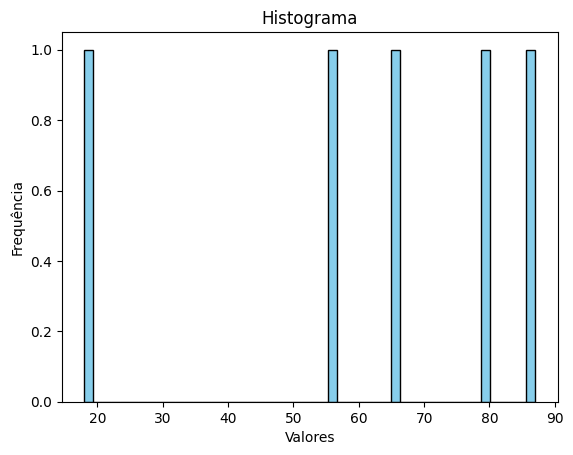

saldo_vencido


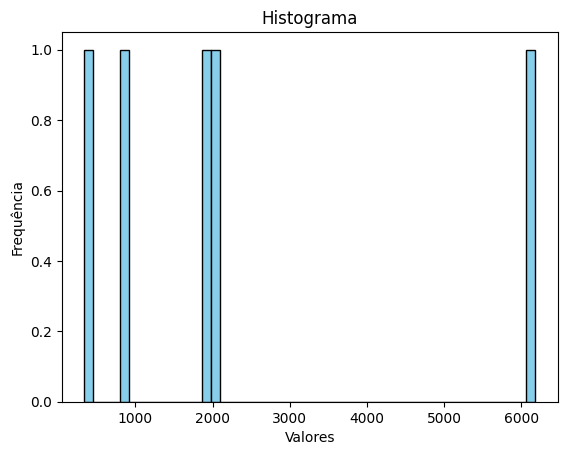

pagamento


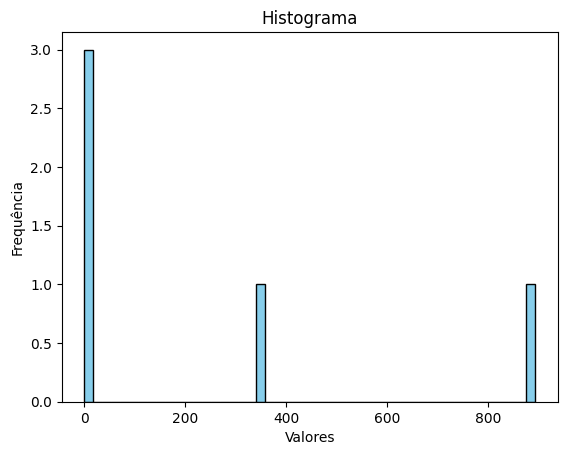

IDADE


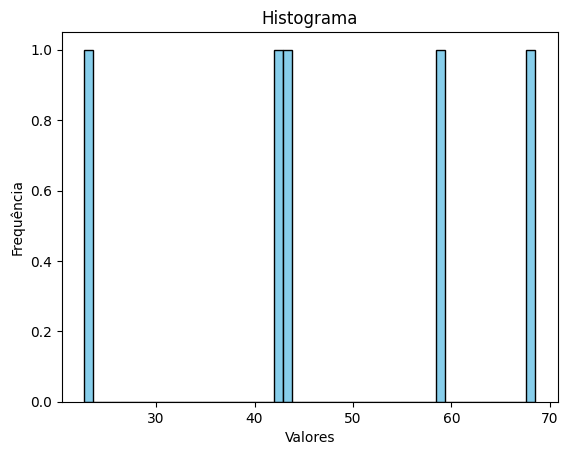

VAR_4


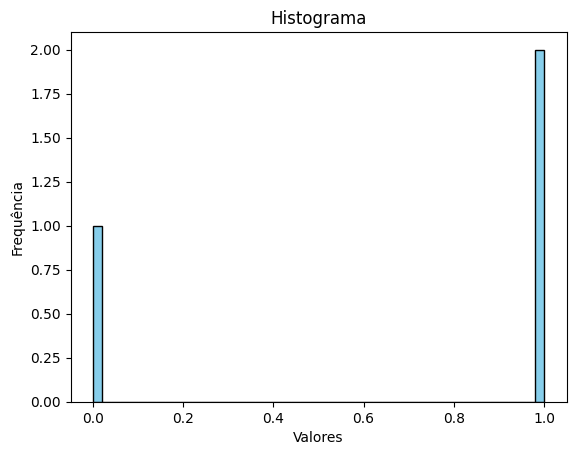

VAR_5


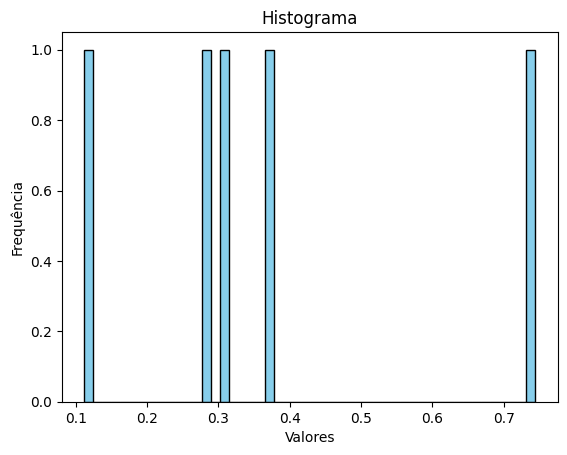

VAR_7


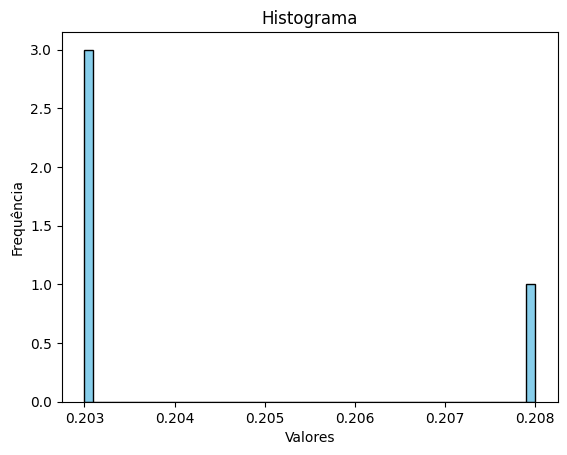

VAR_8


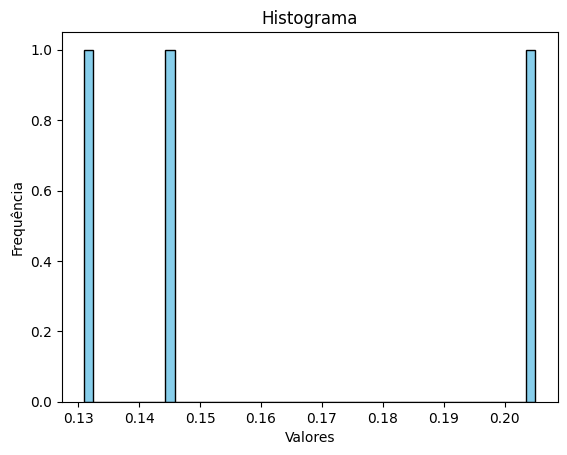

VAR_9


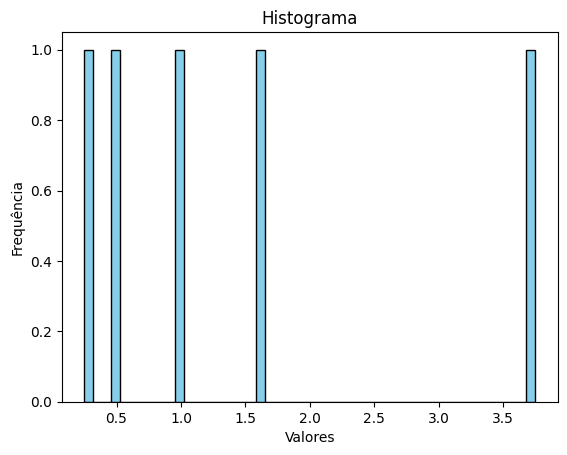

VAR_11


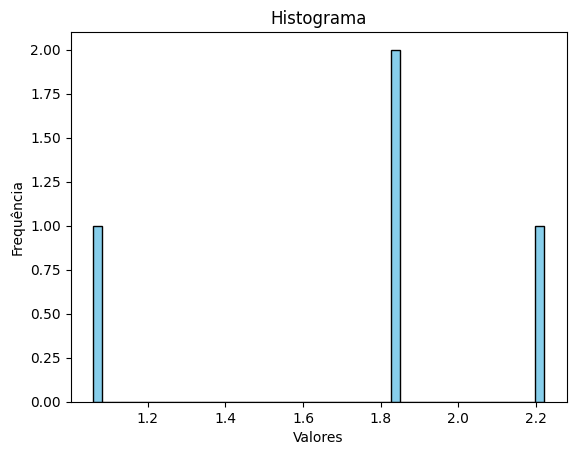

VAR_12


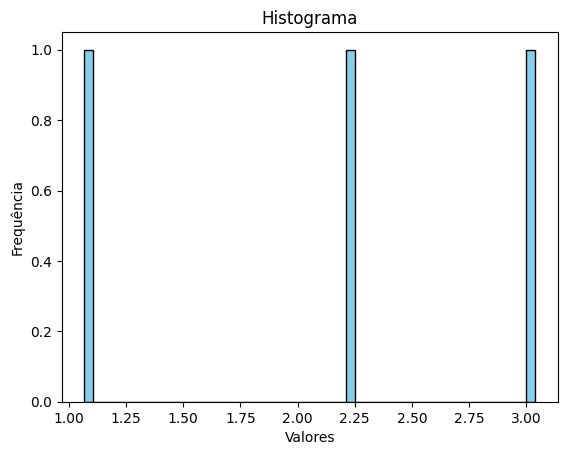

VAR_15


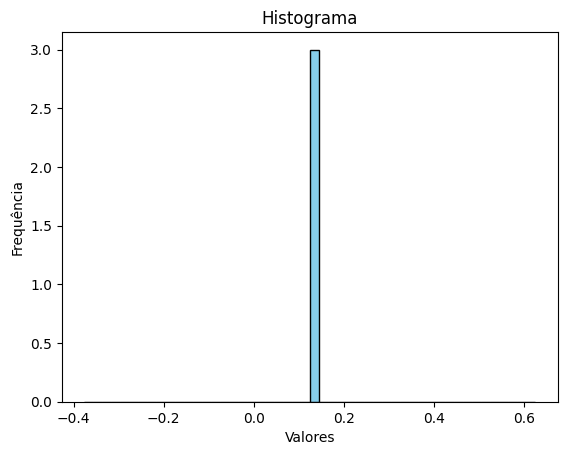

VAR_17


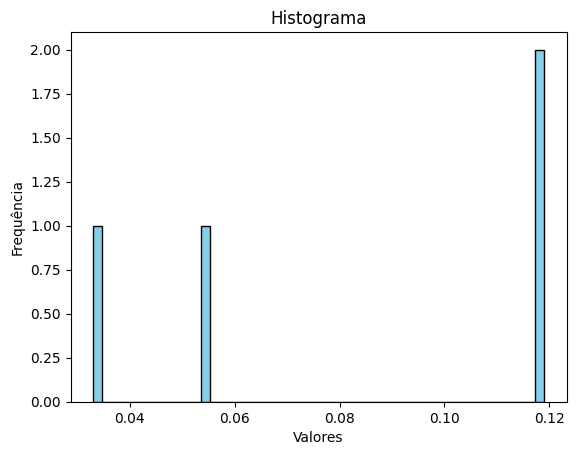

VAR_18


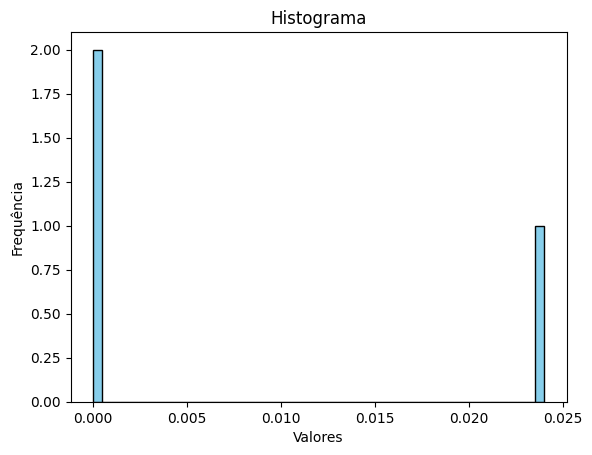

VAR_21


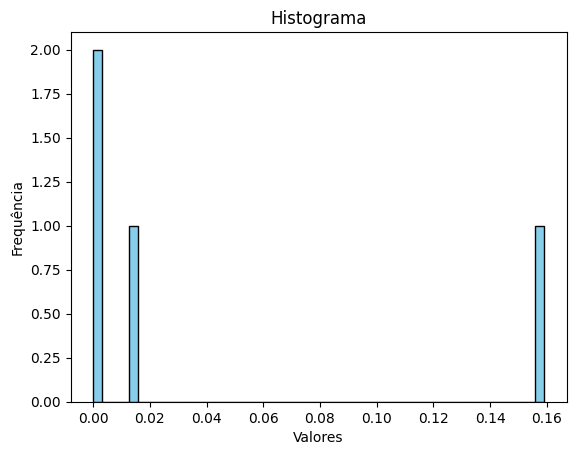

VAR_22


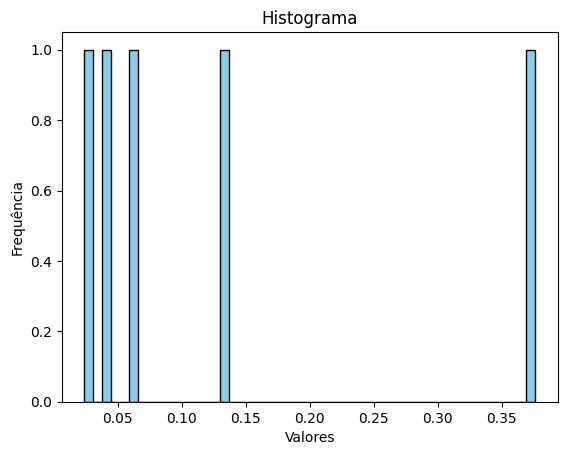

VAR_23


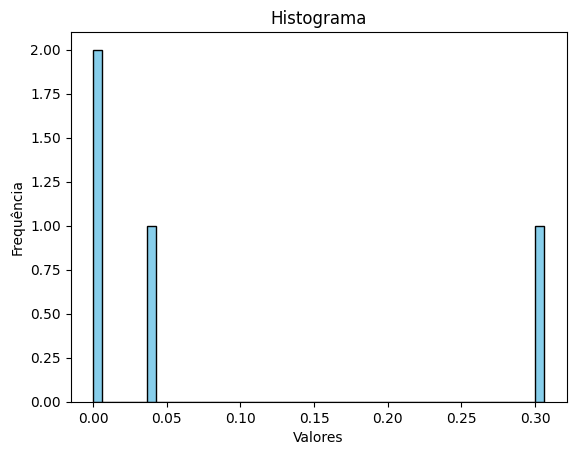

VAR_32


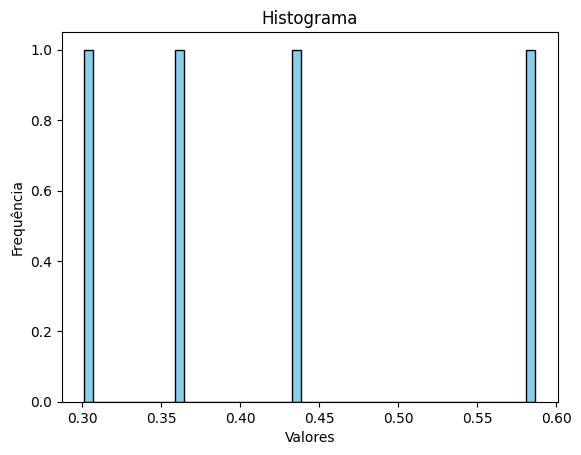

VAR_33


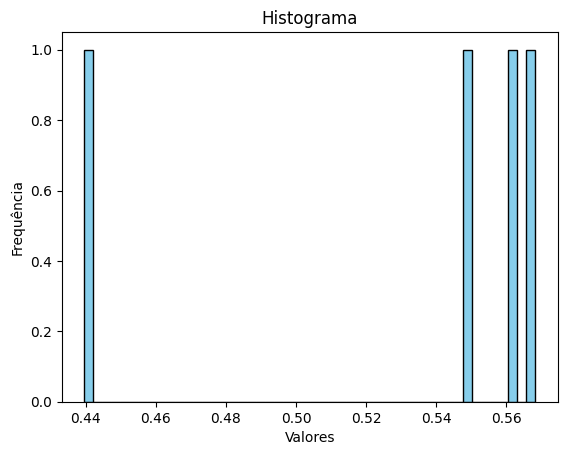

VAR_34


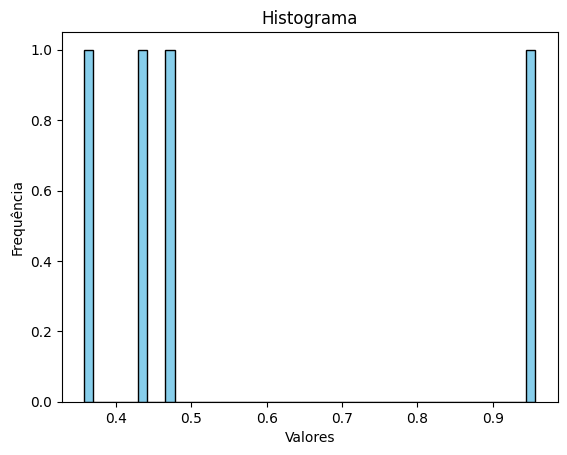

VAR_35


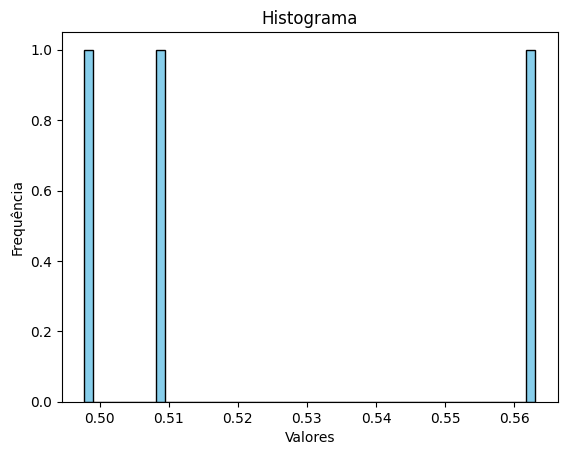

VAR_40


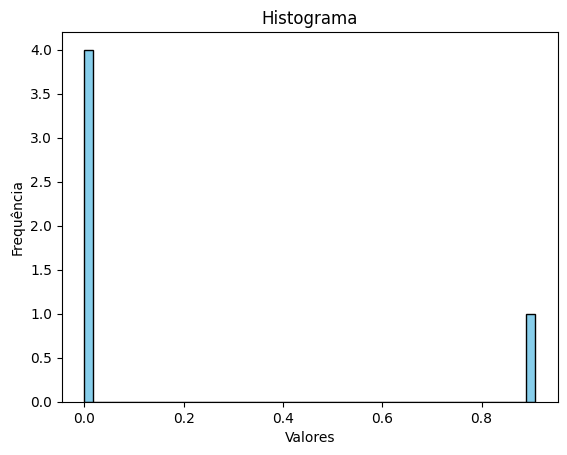

VAR_134


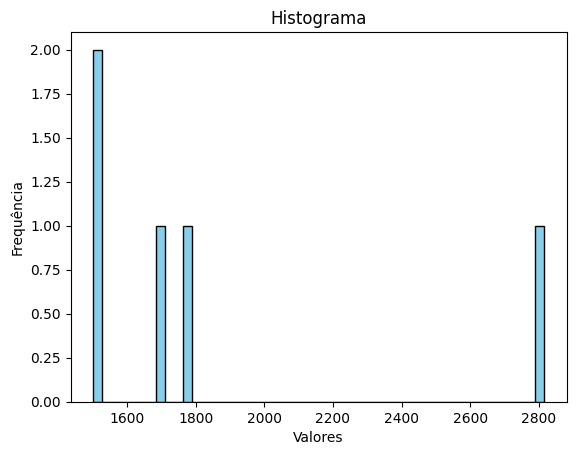

VAR_138


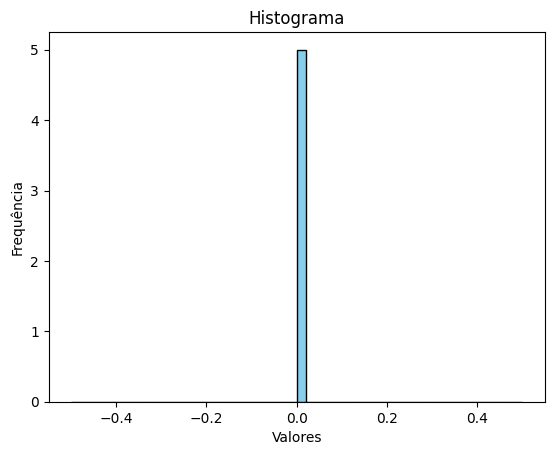

VAR_139


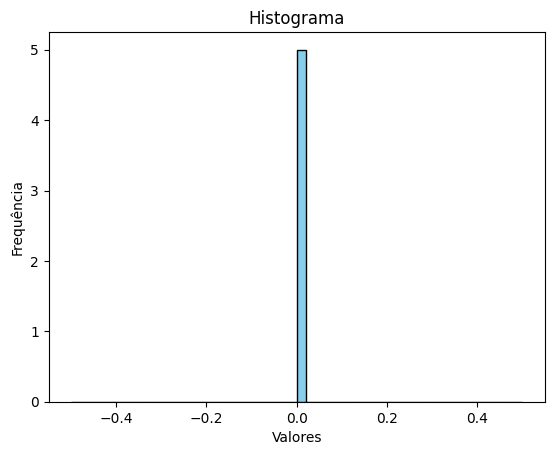

VAR_140


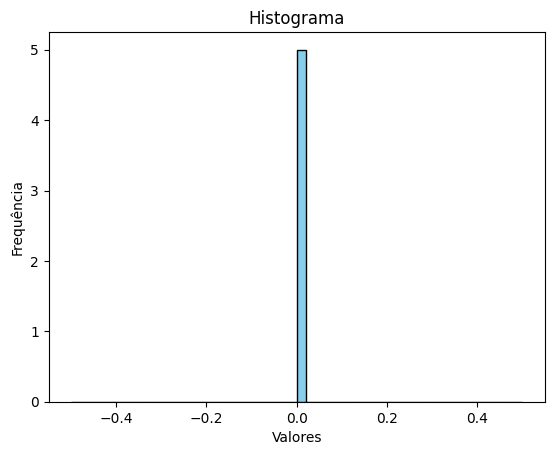

VAR_141


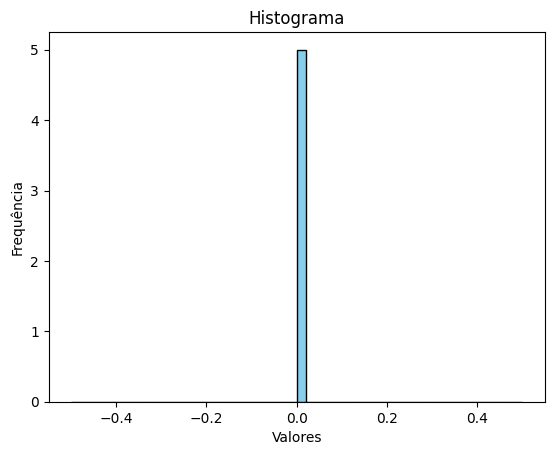

VAR_142


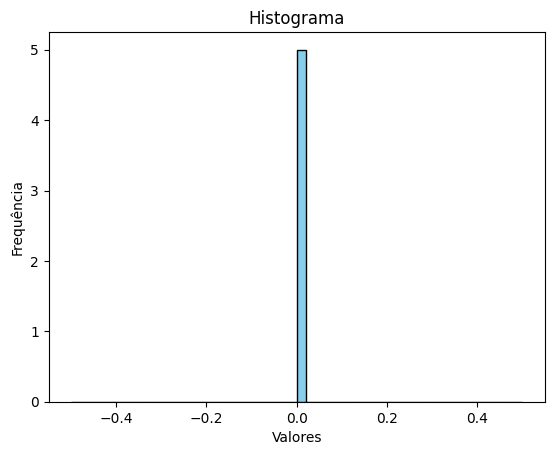

VAR_143


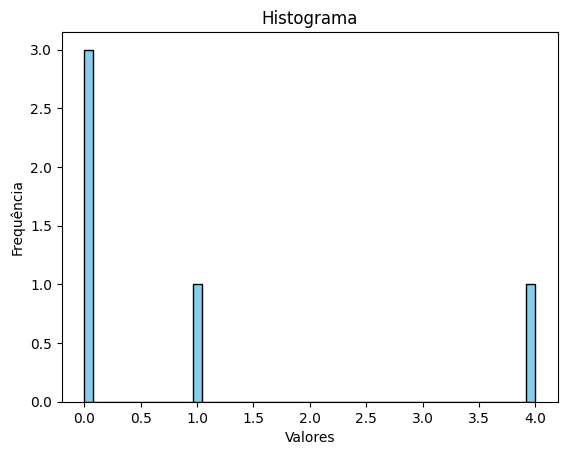

VAR_144


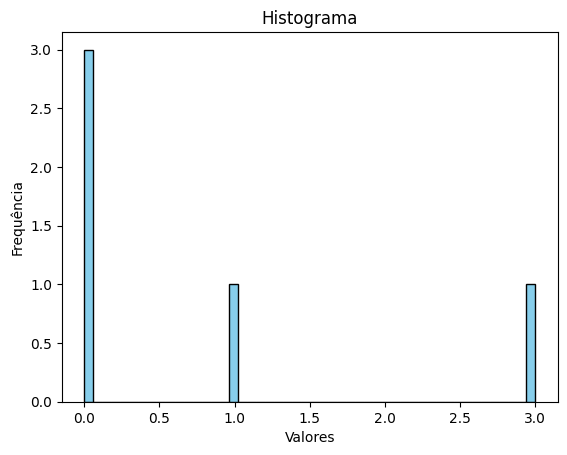

VAR_145


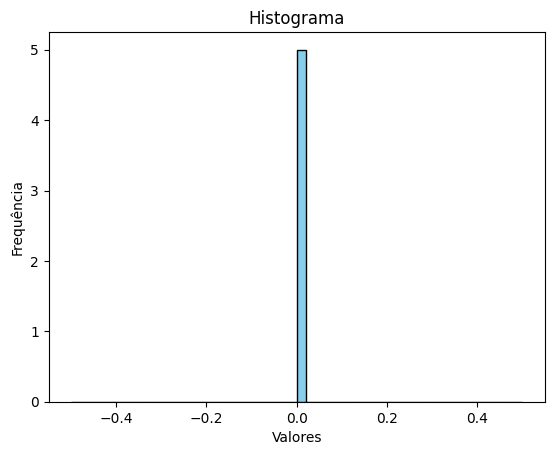

VAR_146


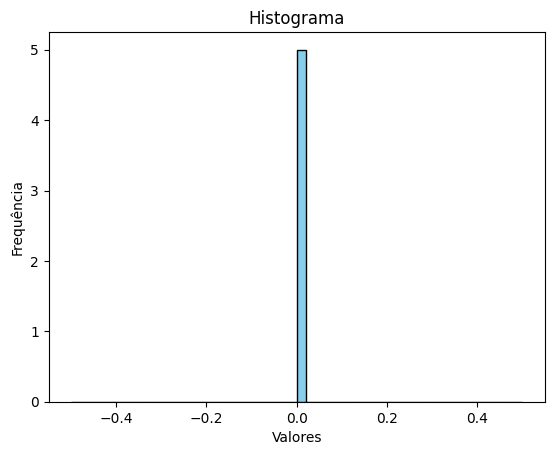

VAR_147


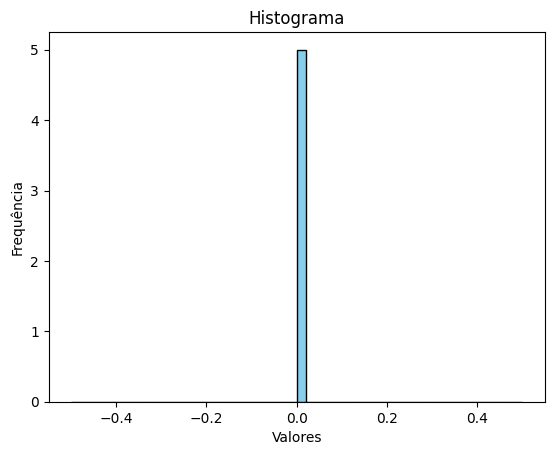

VAR_148


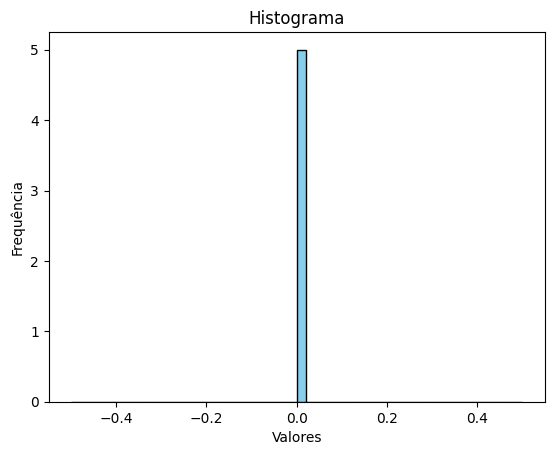

VAR_149


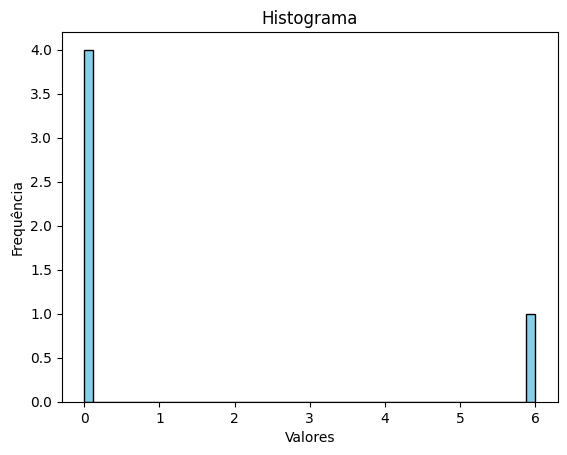

VAR_150


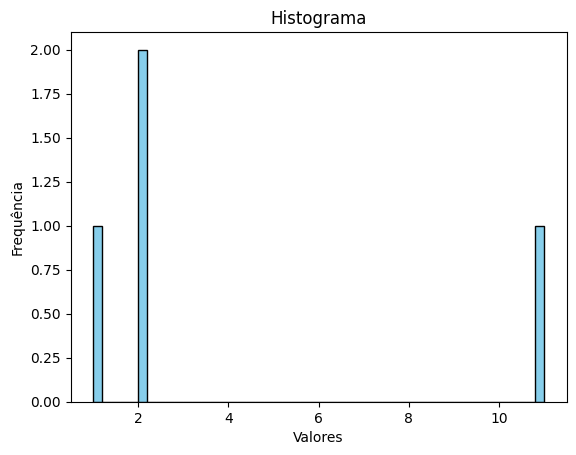

VAR_151


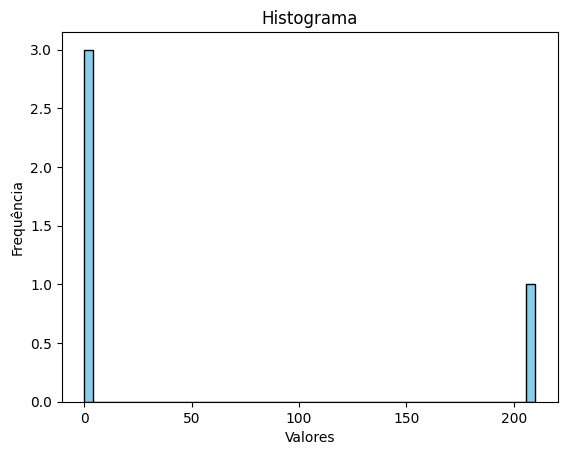

VAR_152


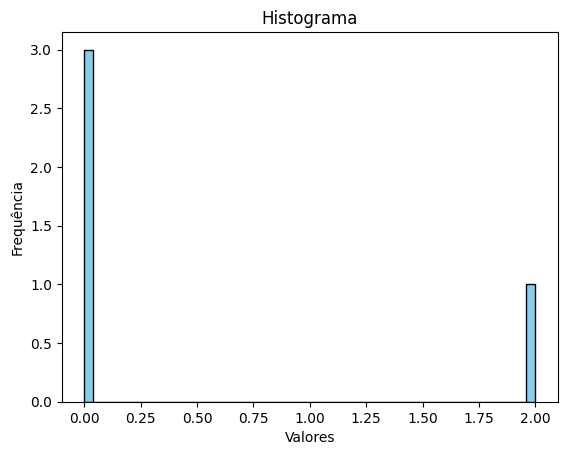

VAR_153


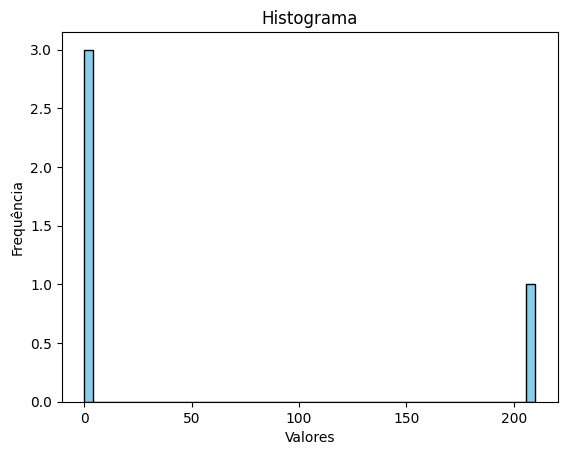

VAR_154


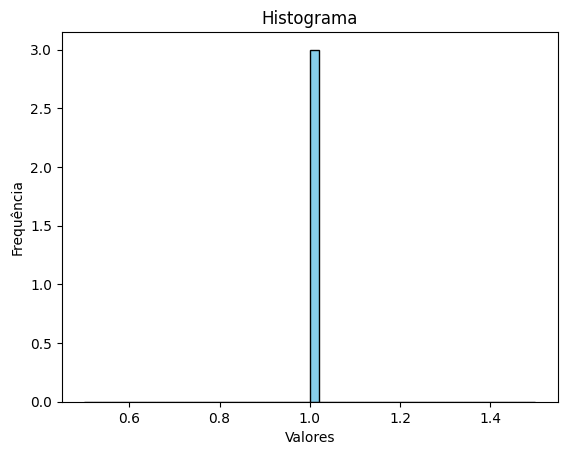

VAR_155


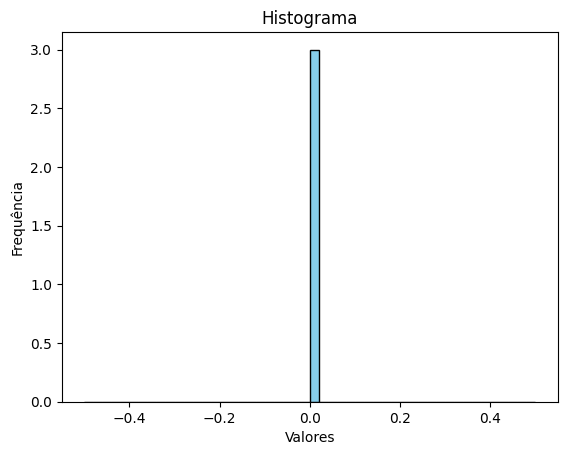

VAR_156


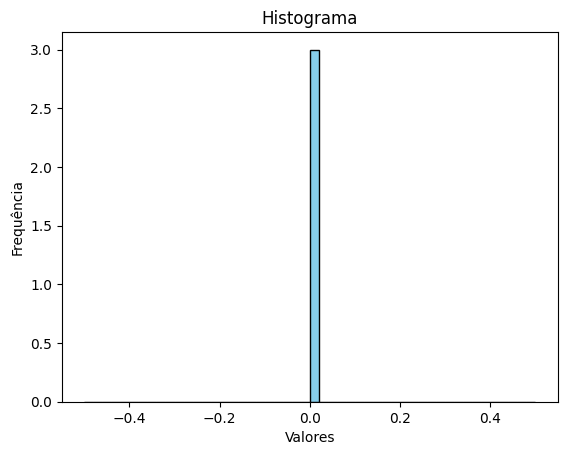

VAR_157


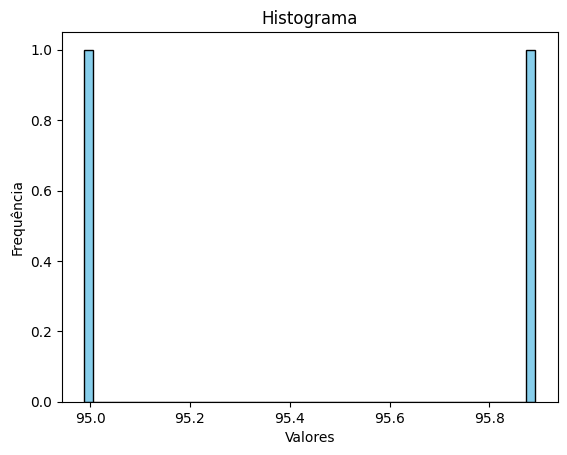

VAR_158


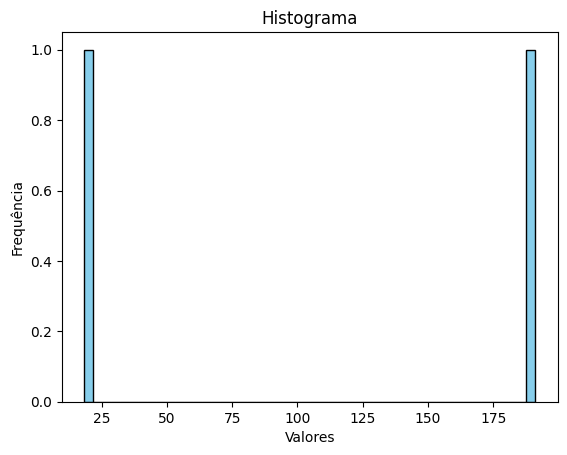

VAR_159


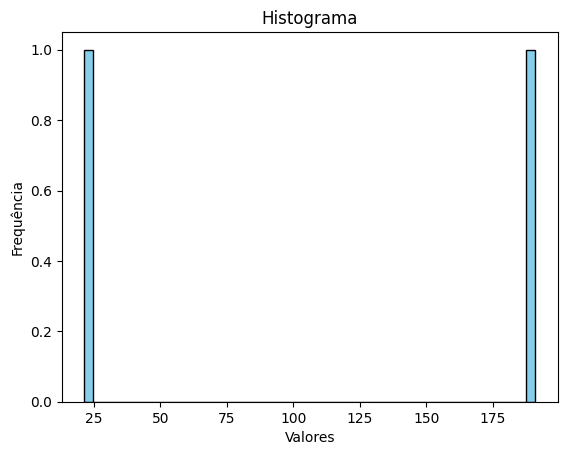

VAR_160


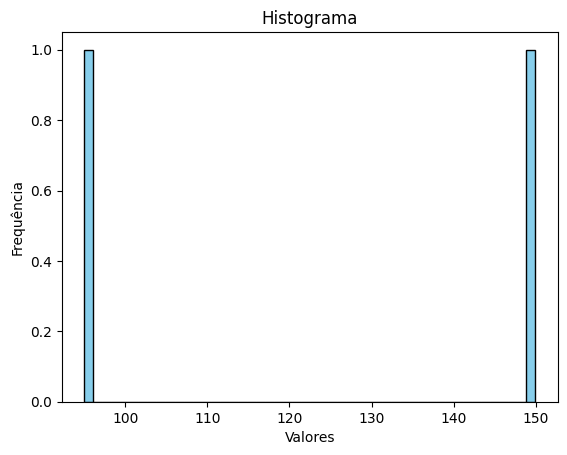

VAR_161


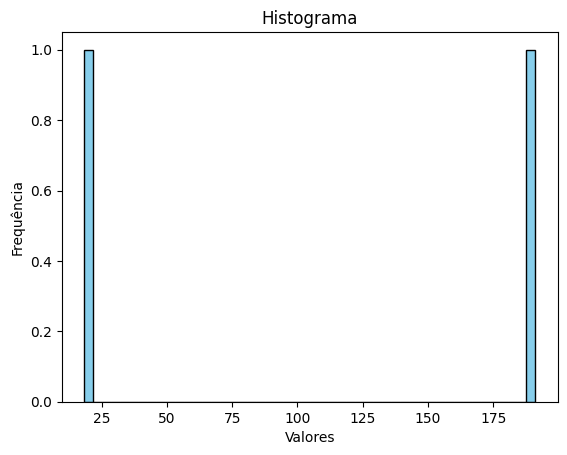

VAR_162


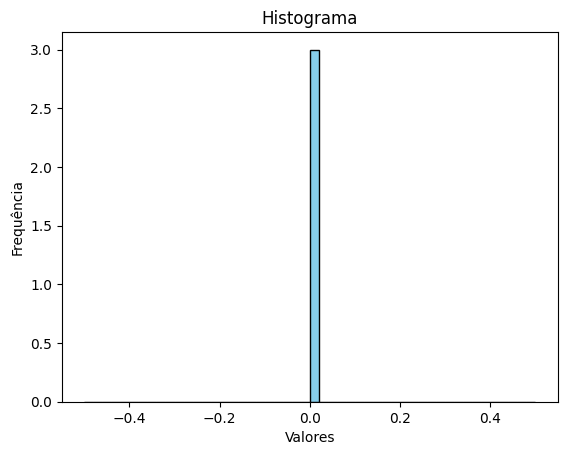

VAR_163


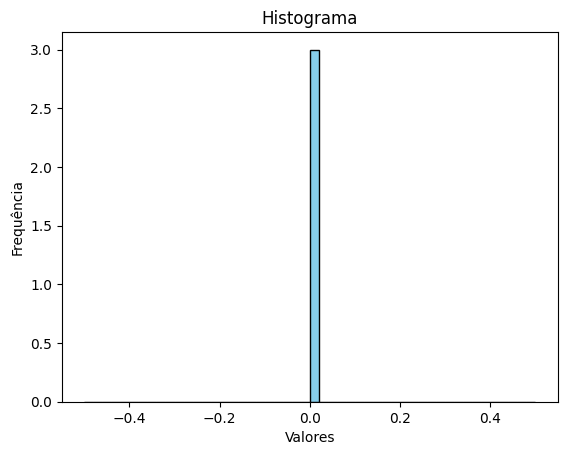

VAR_164


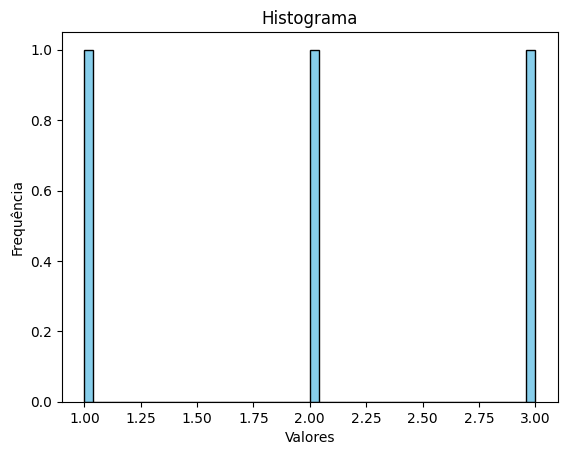

VAR_165


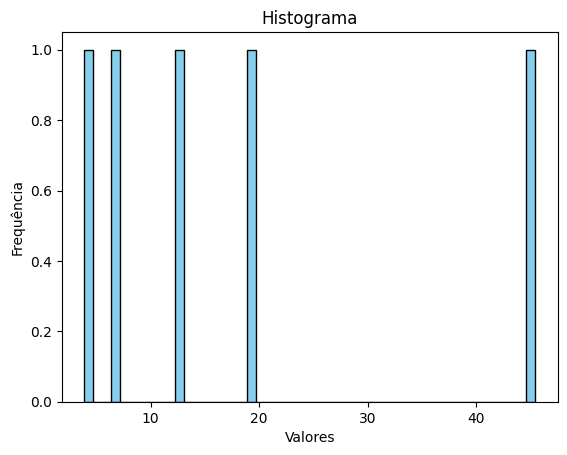

VAR_166


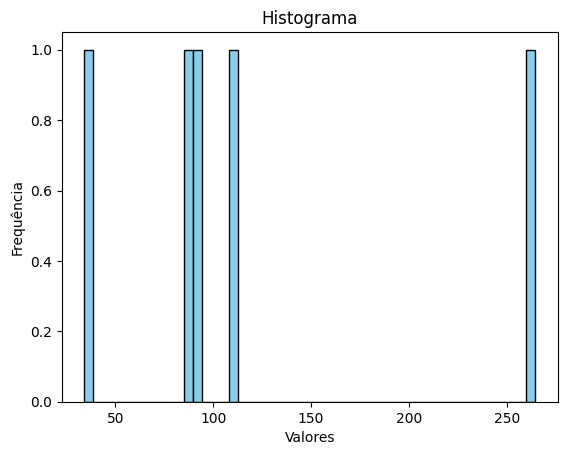

VAR_167


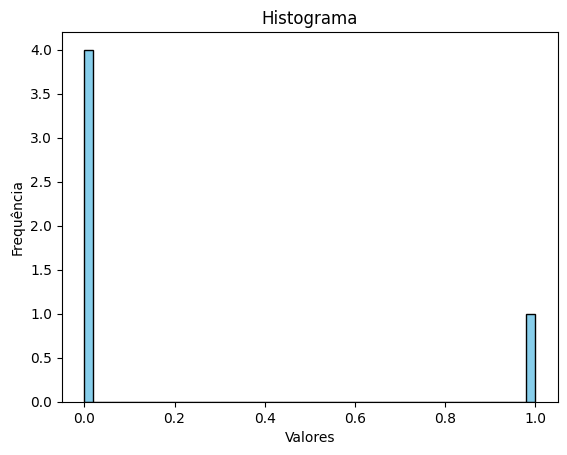

VAR_168


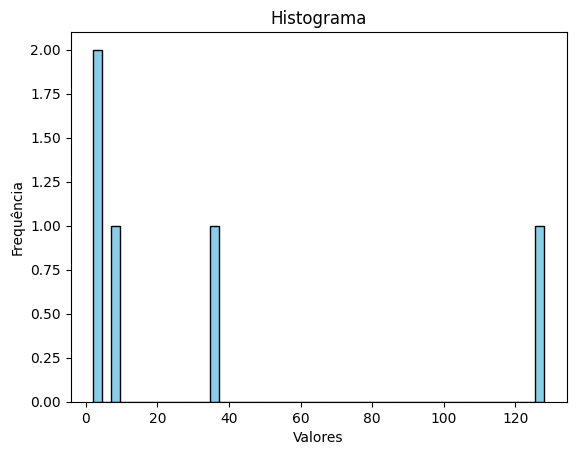

VAR_169


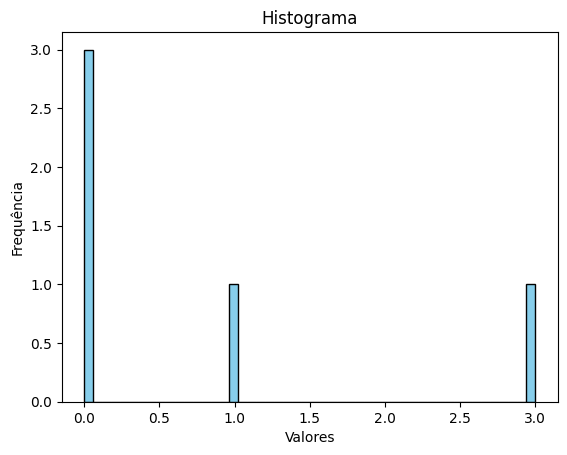

VAR_170


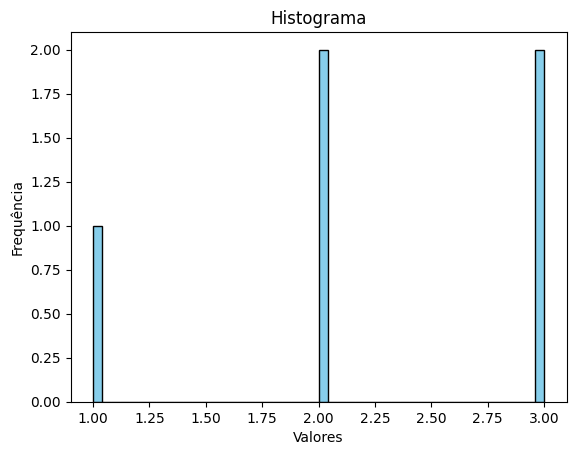

VAR_171


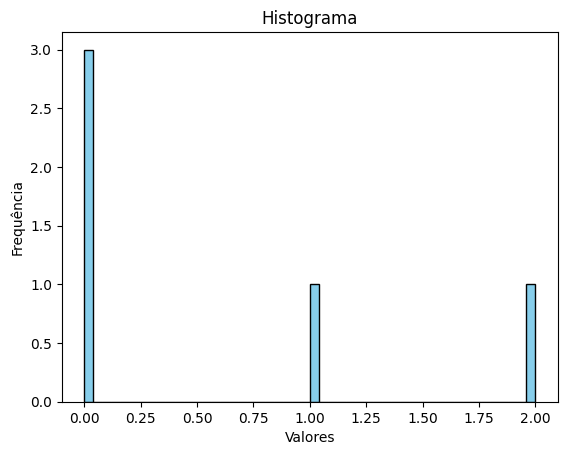

VAR_172


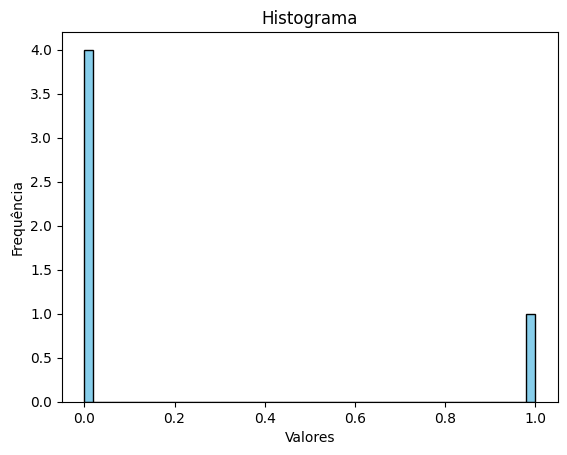

VAR_173


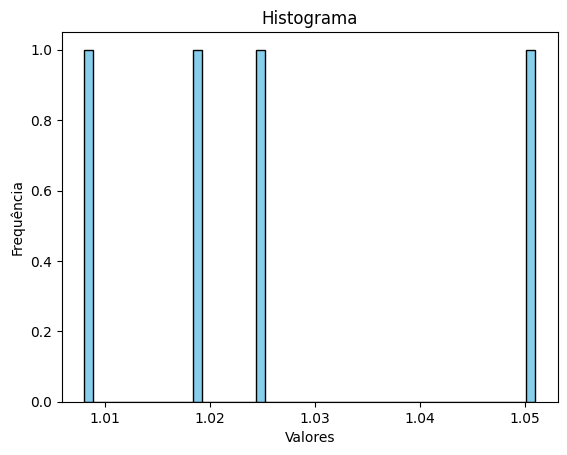

VAR_174


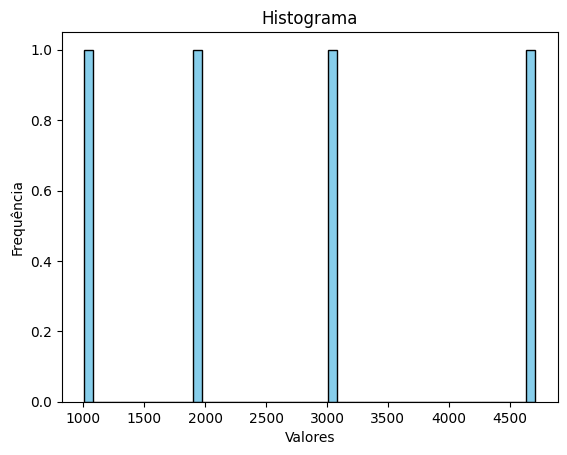

VAR_175


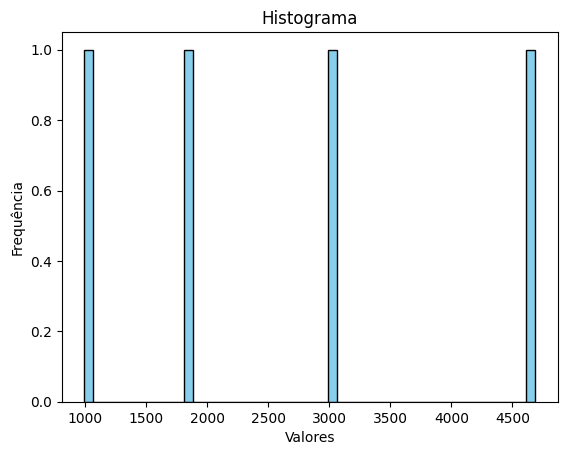

VAR_176


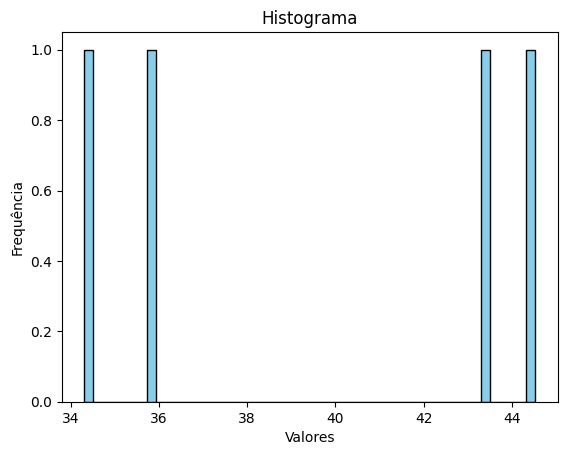

VAR_177


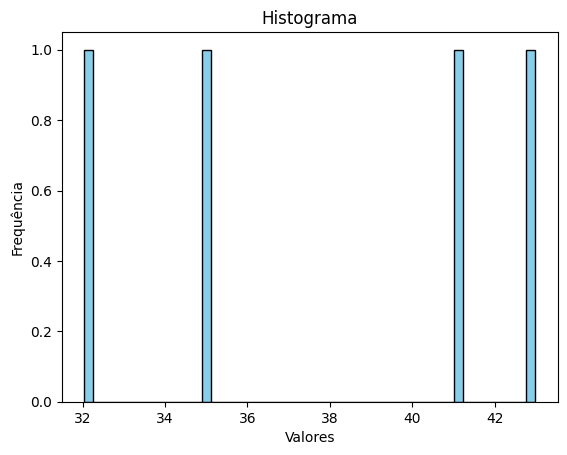

VAR_178


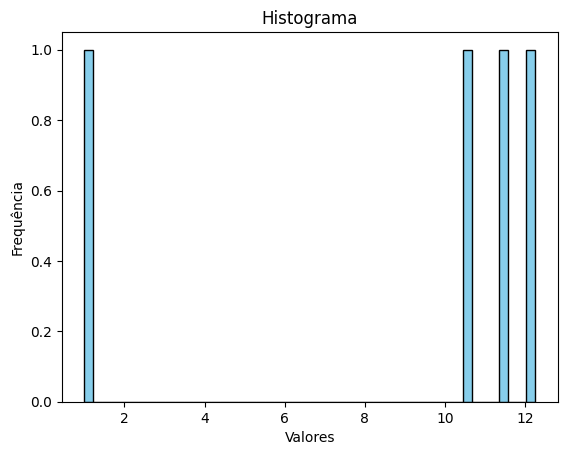

VAR_179


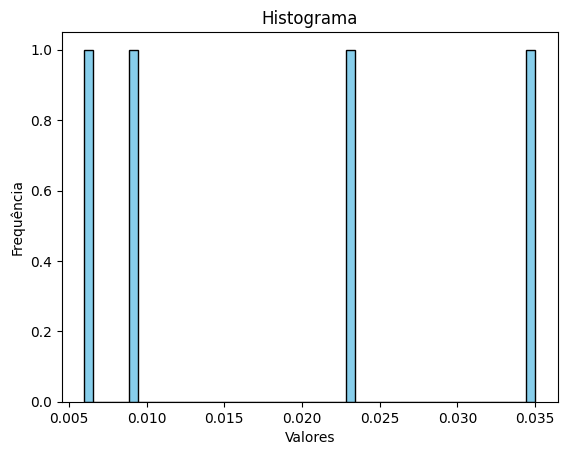

VAR_180


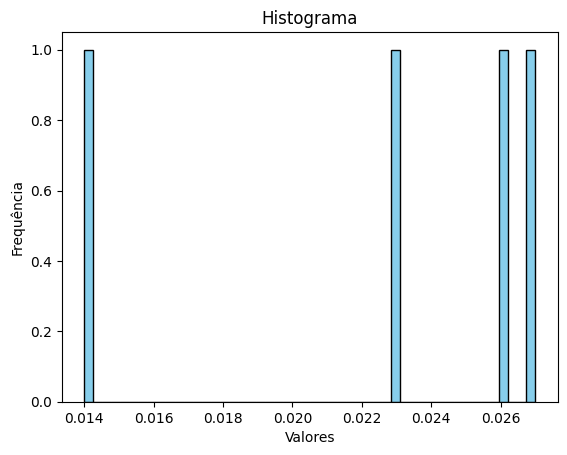

VAR_181


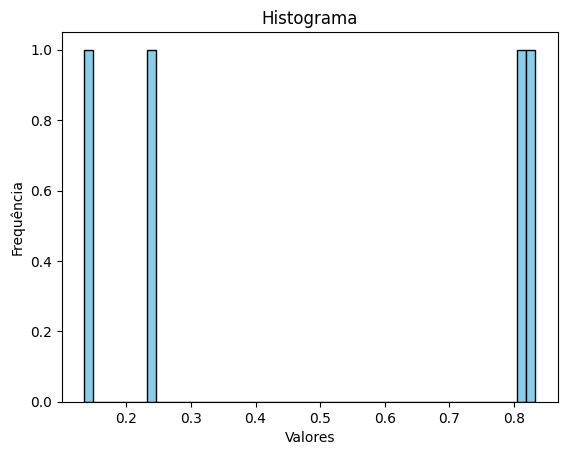

VAR_182


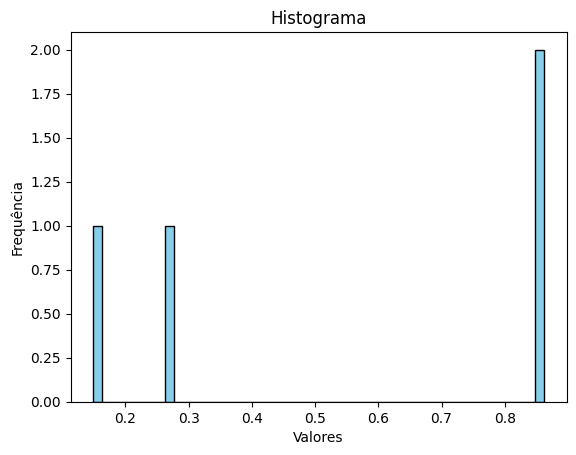

VAR_183


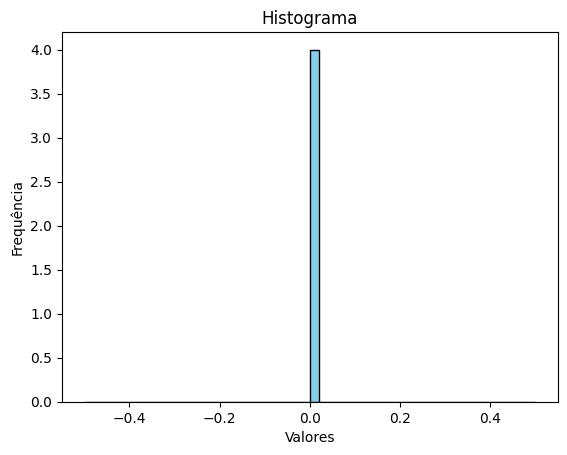

VAR_184


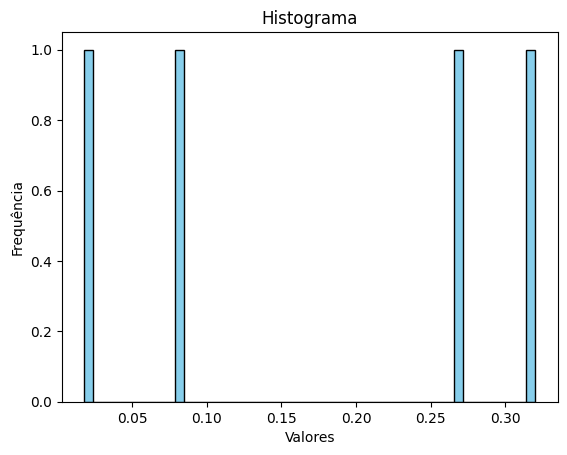

VAR_185


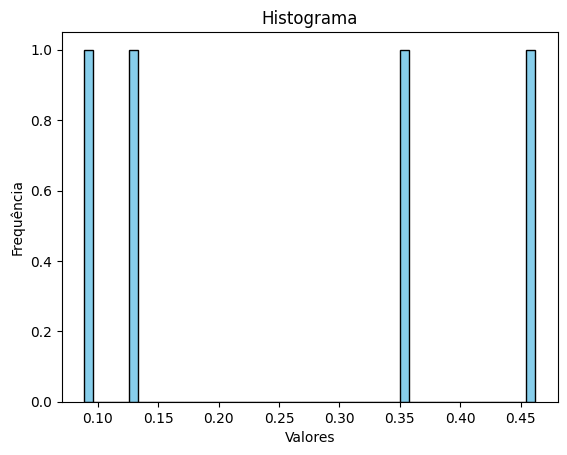

VAR_186


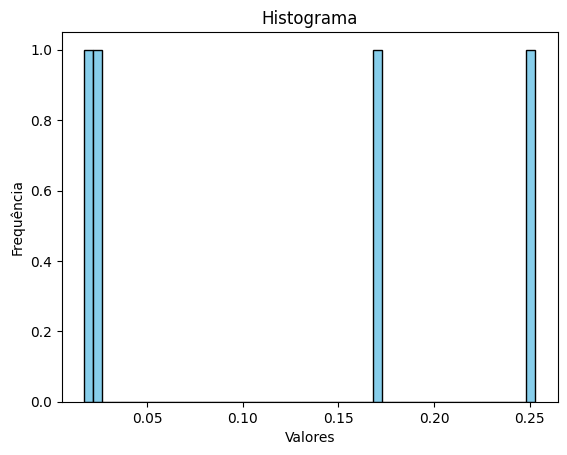

VAR_187


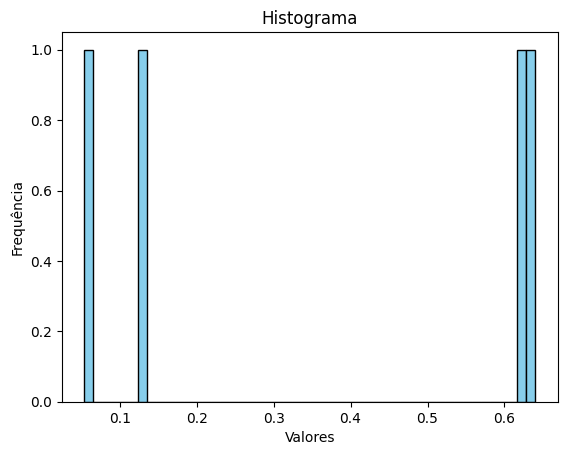

VAR_188


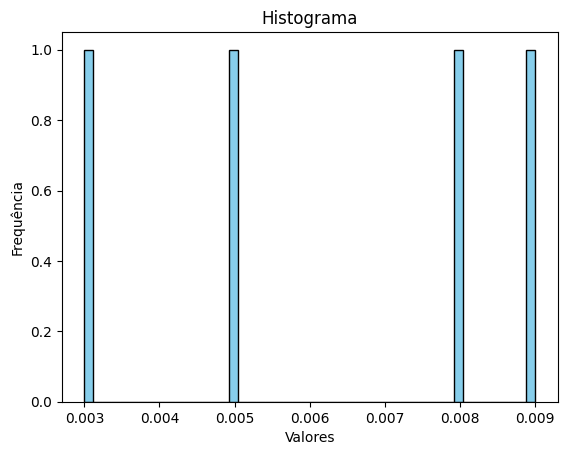

VAR_189


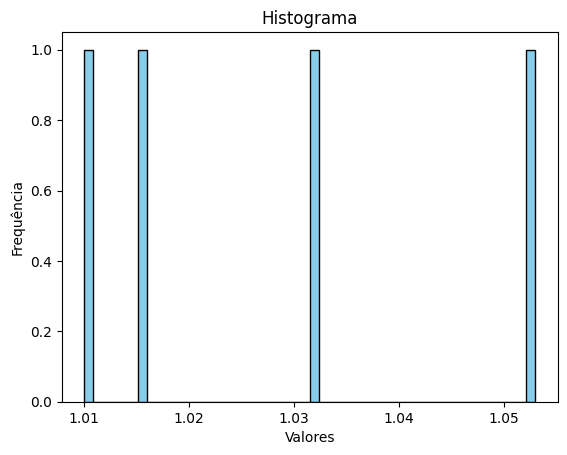

VAR_190


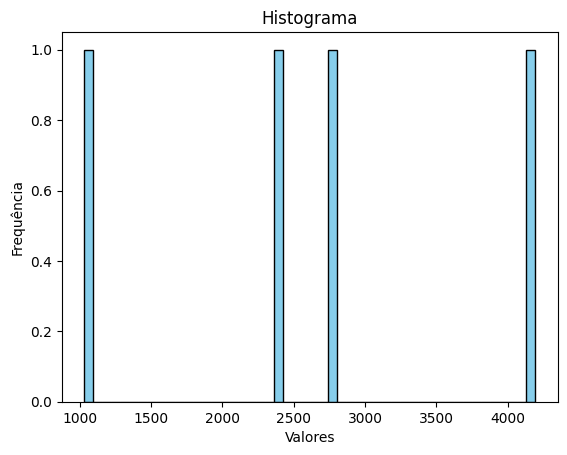

VAR_191


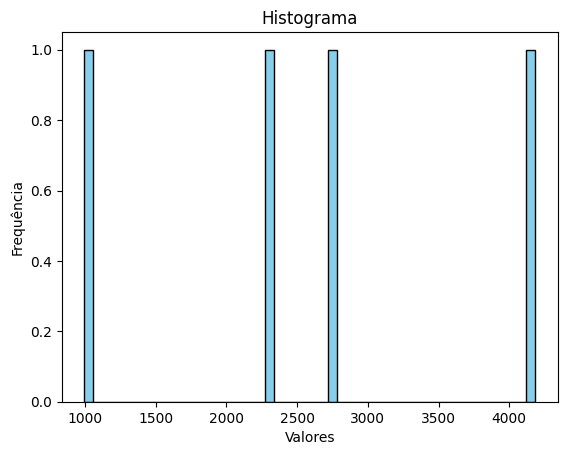

VAR_192


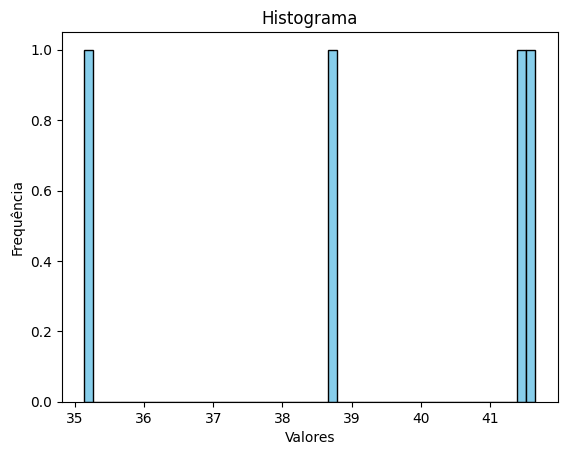

VAR_193


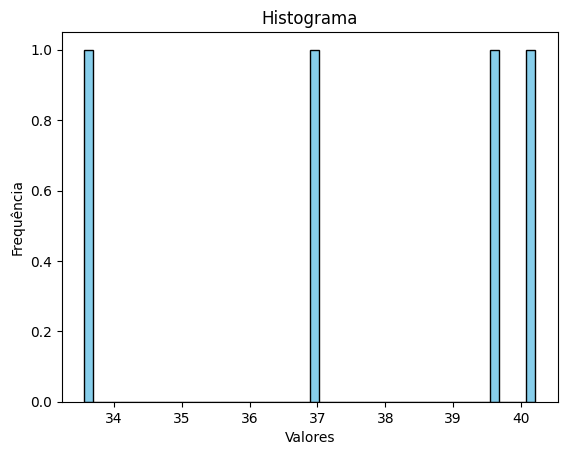

VAR_194


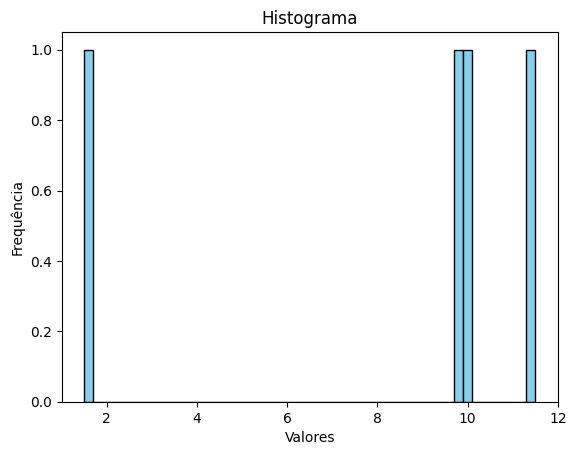

VAR_195


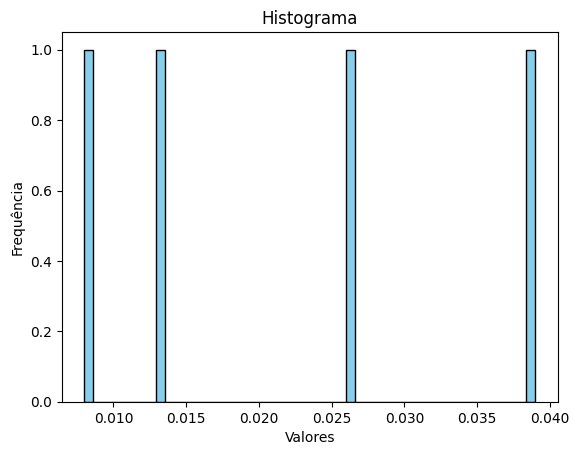

VAR_196


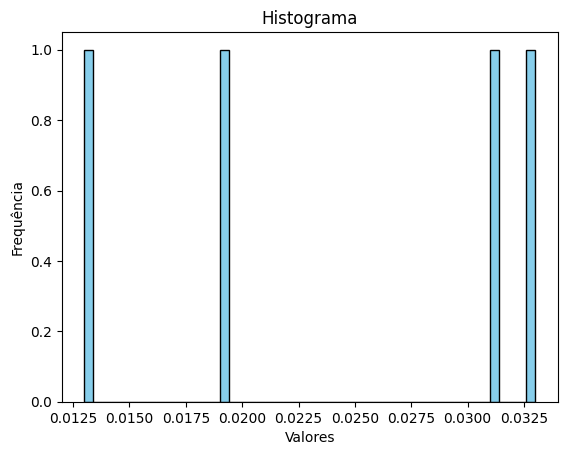

VAR_197


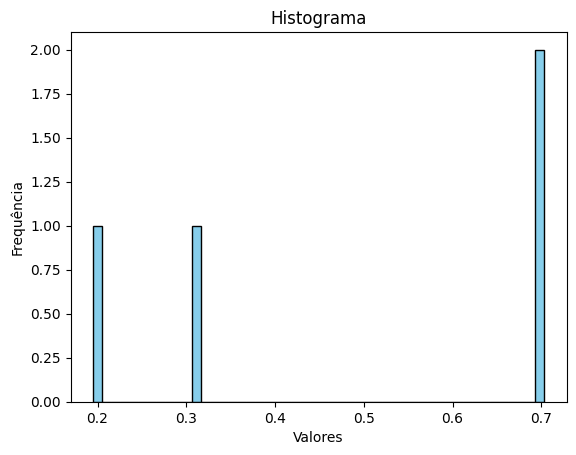

VAR_198


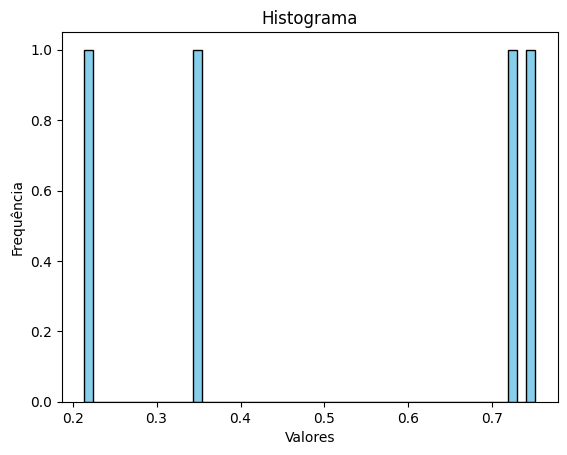

VAR_199


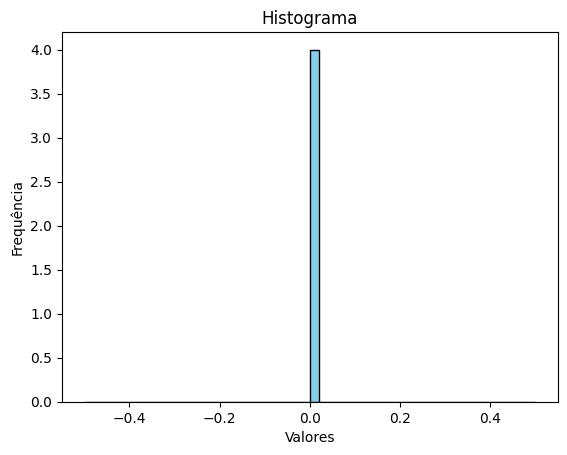

VAR_200


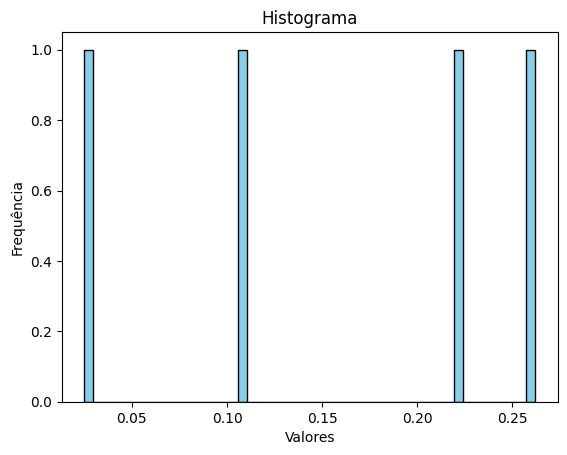

VAR_201


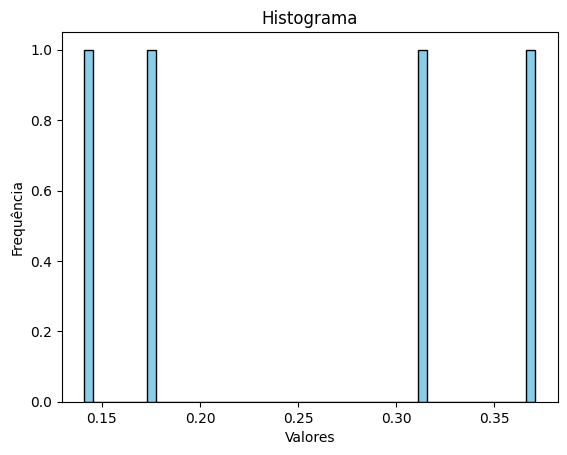

VAR_202


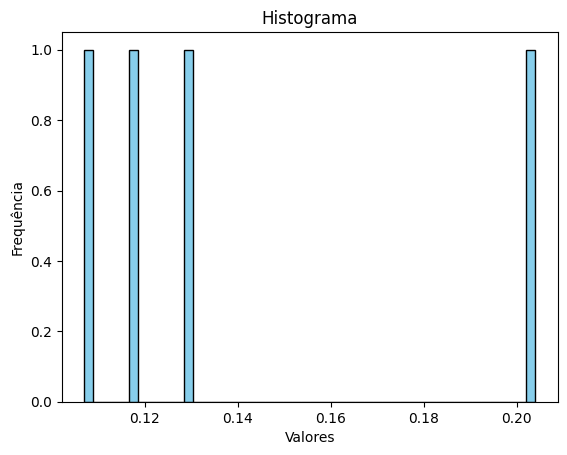

VAR_203


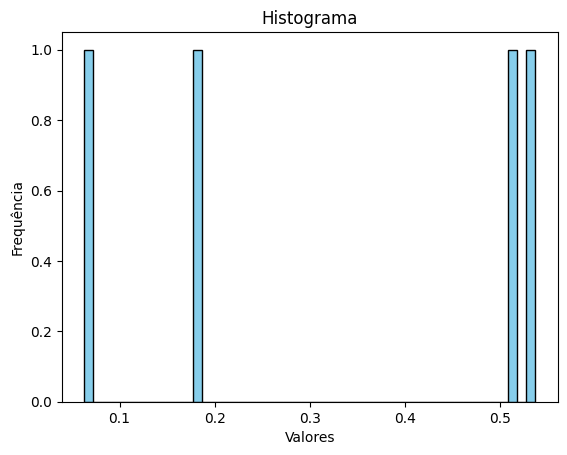

VAR_204


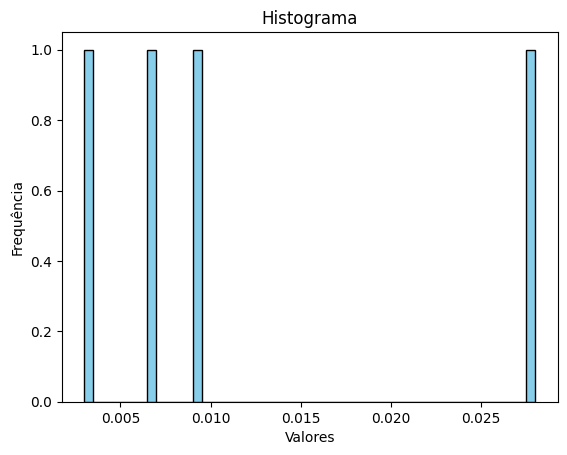

VAR_205


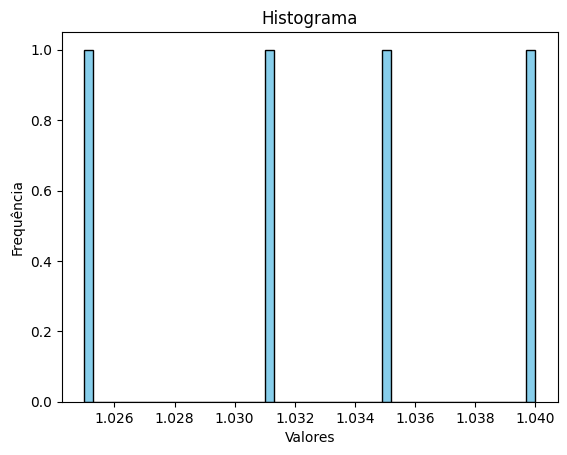

VAR_206


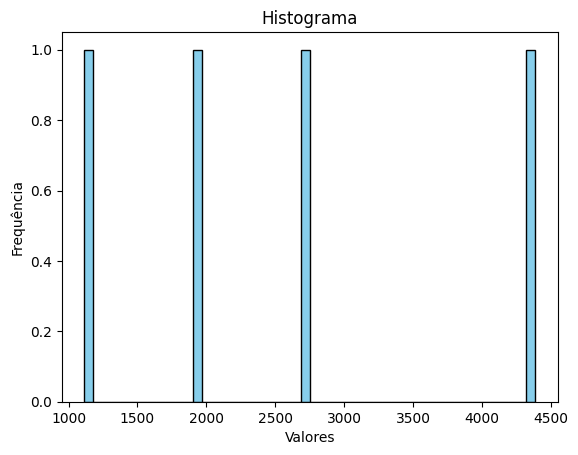

VAR_207


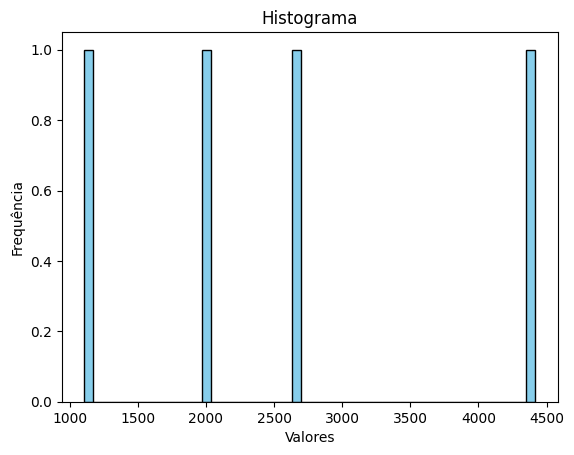

VAR_208


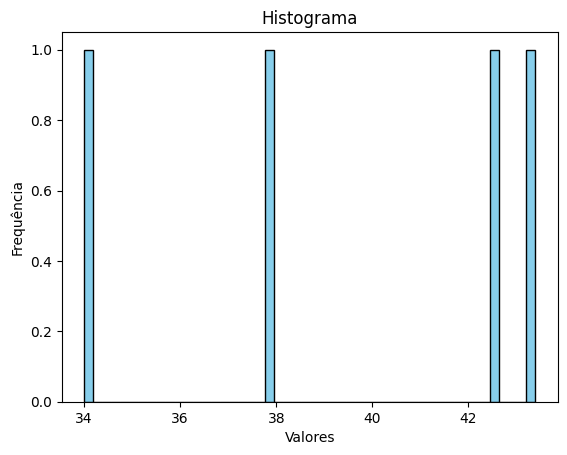

VAR_209


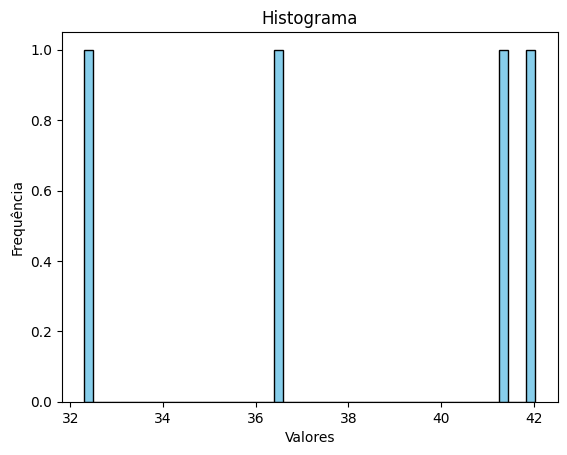

VAR_210


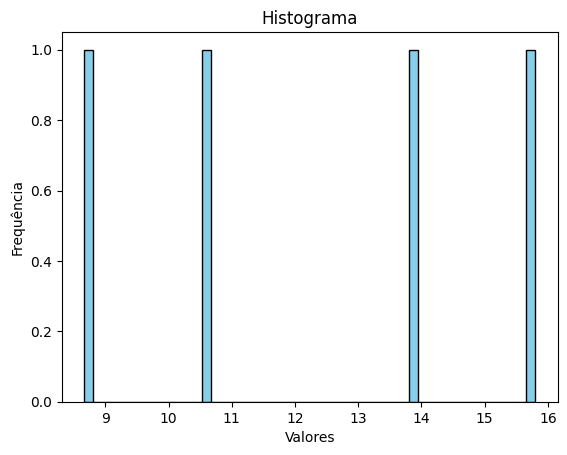

VAR_211


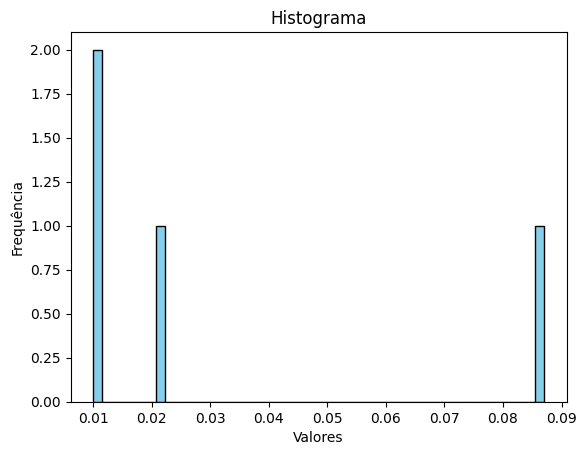

VAR_212


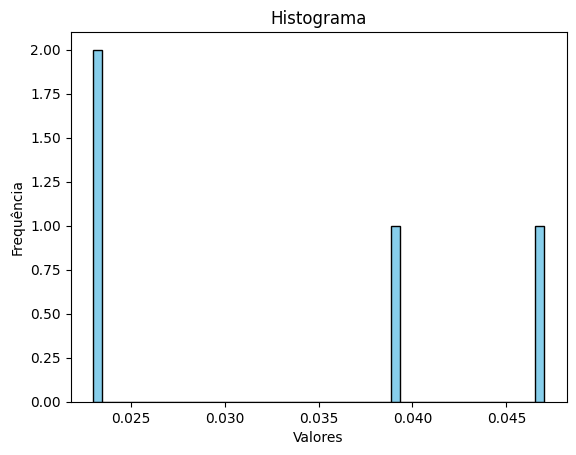

VAR_213


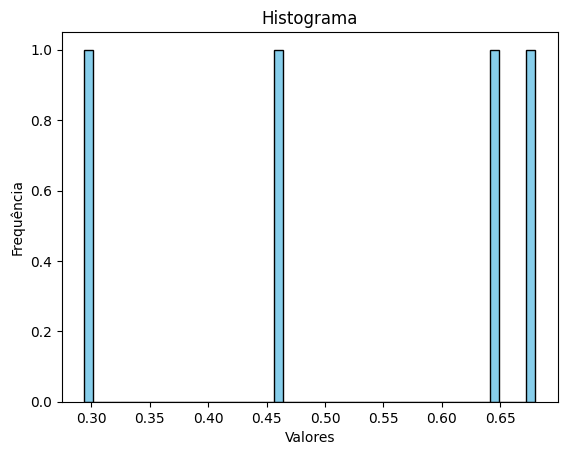

VAR_214


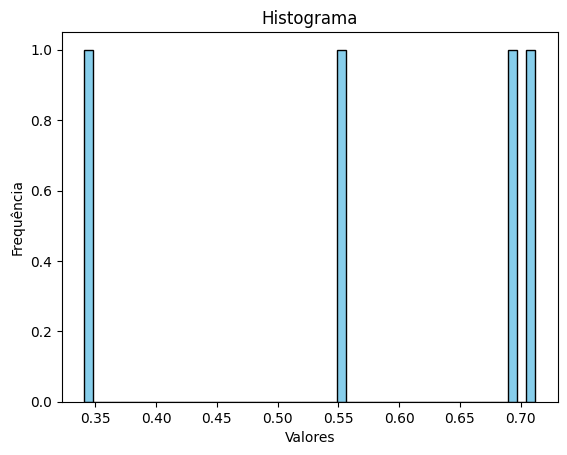

VAR_215


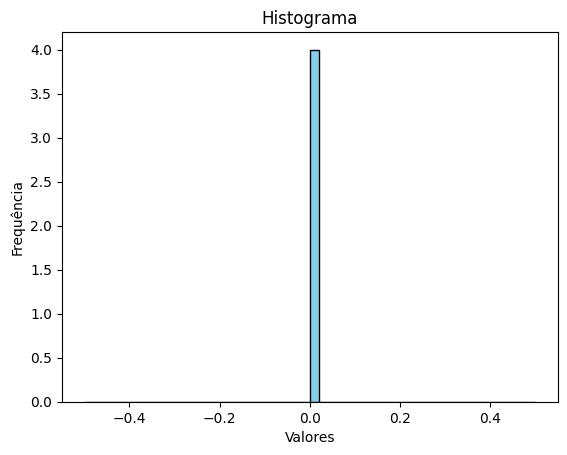

VAR_216


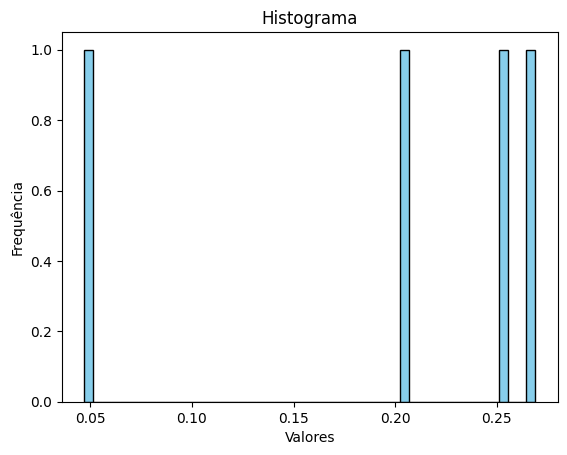

VAR_217


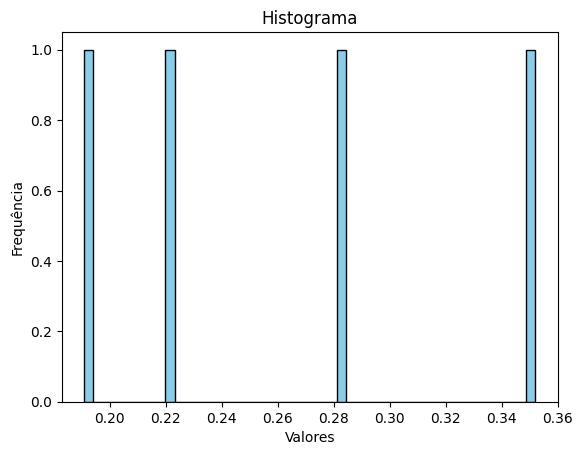

VAR_218


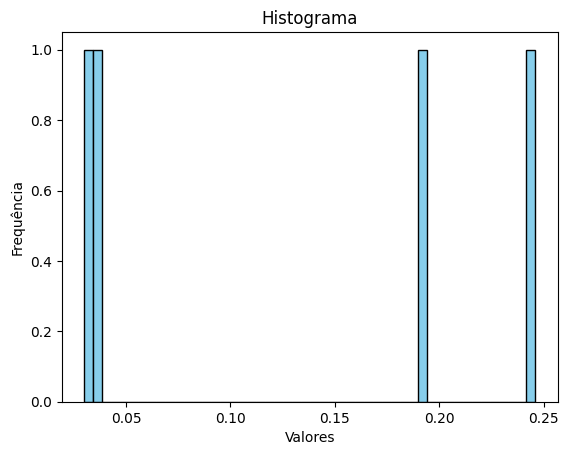

VAR_219


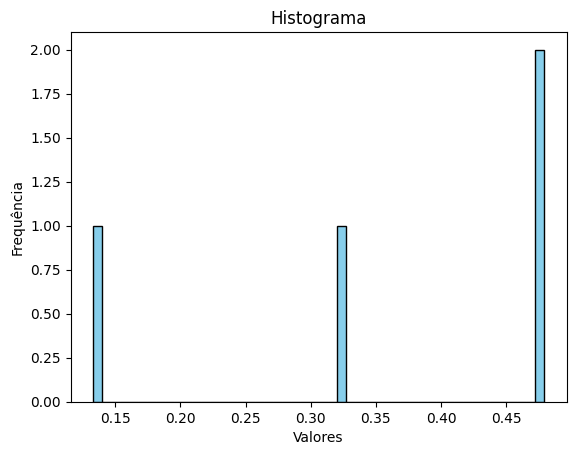

VAR_220


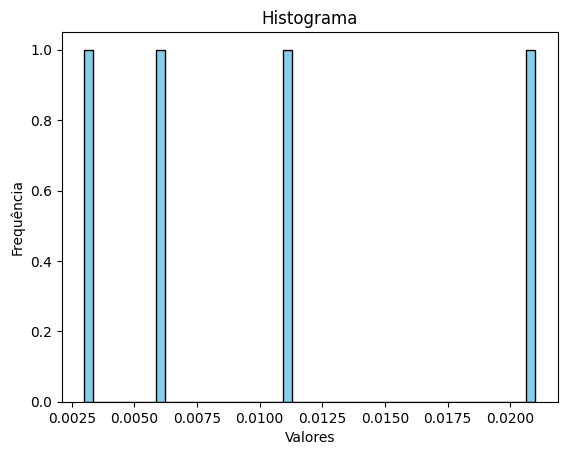

VAR_221


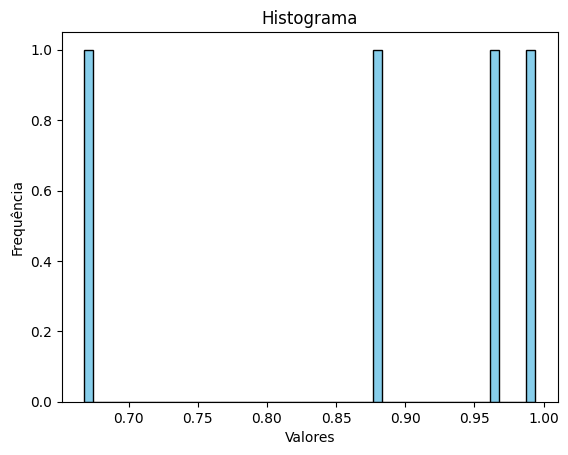

VAR_222


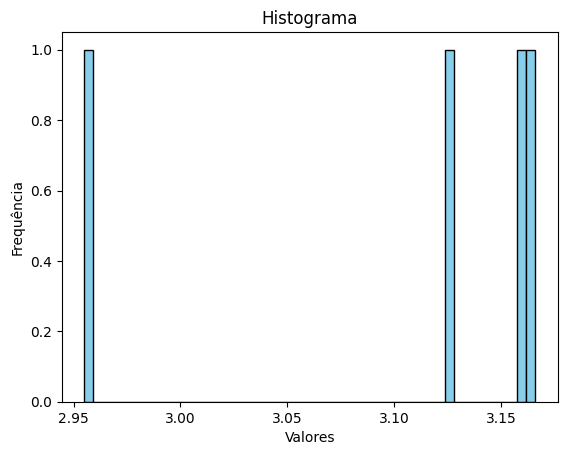

VAR_223


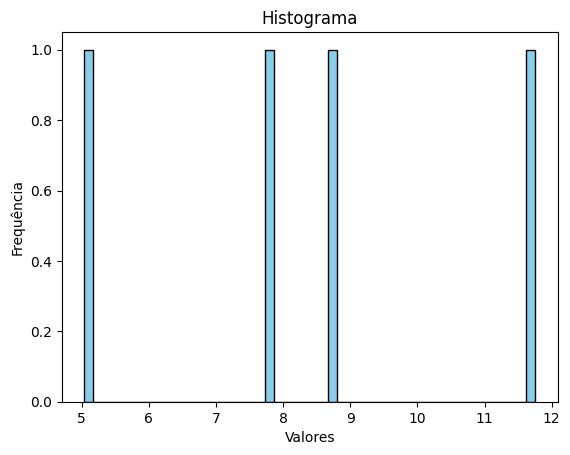

VAR_224


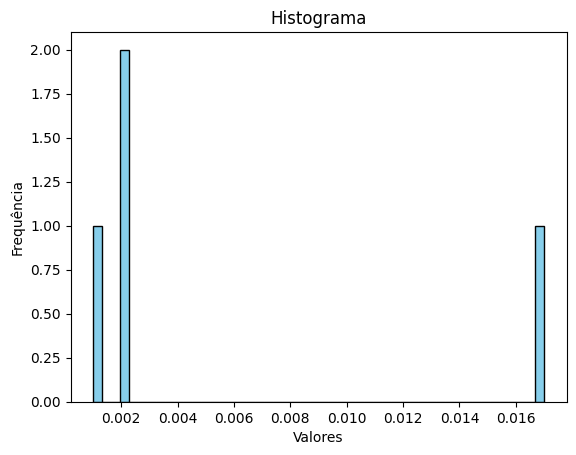

VAR_225


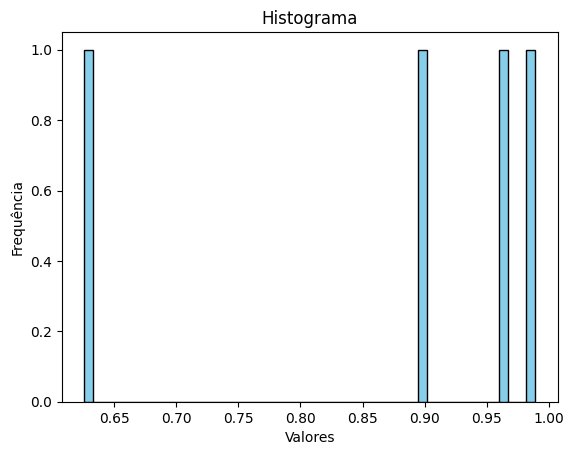

VAR_226


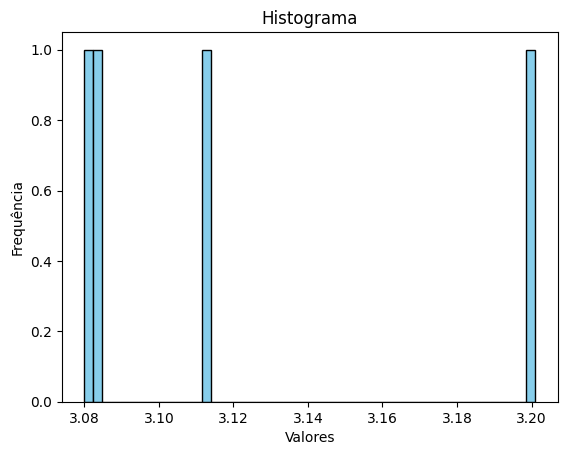

VAR_227


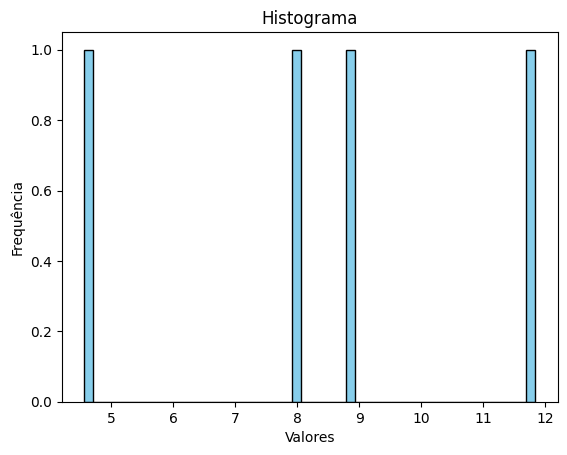

VAR_228


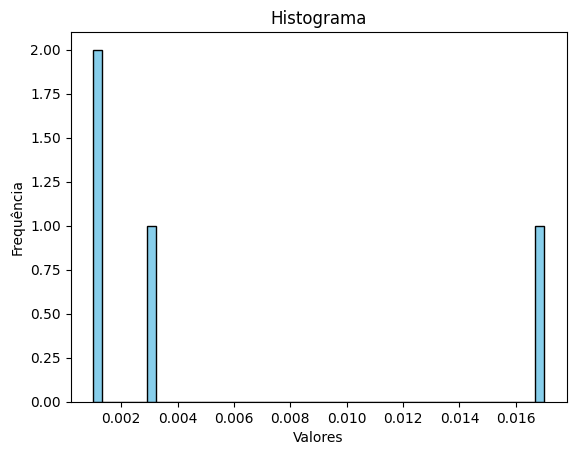

VAR_229


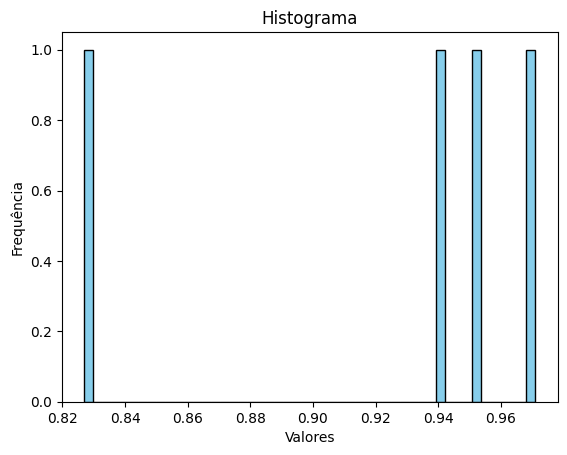

VAR_230


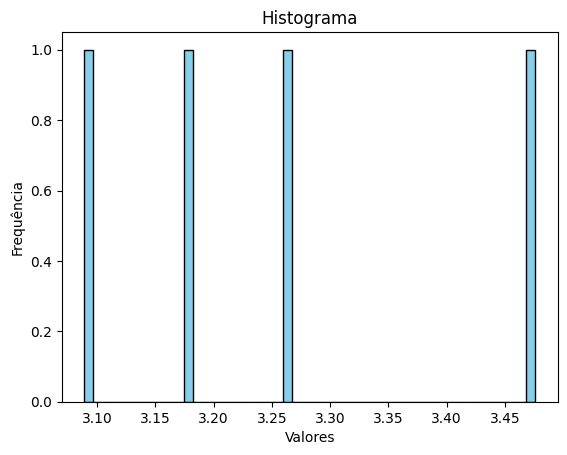

VAR_231


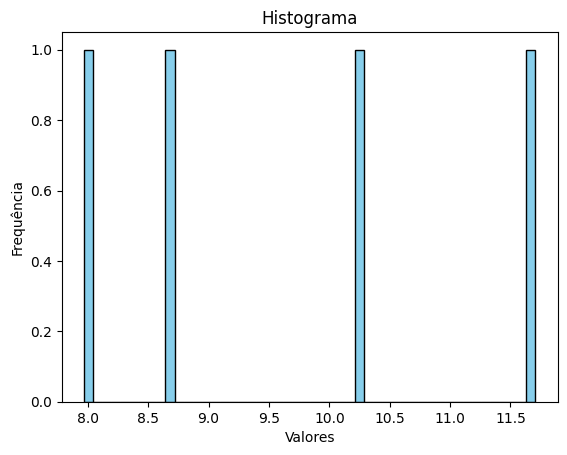

VAR_232


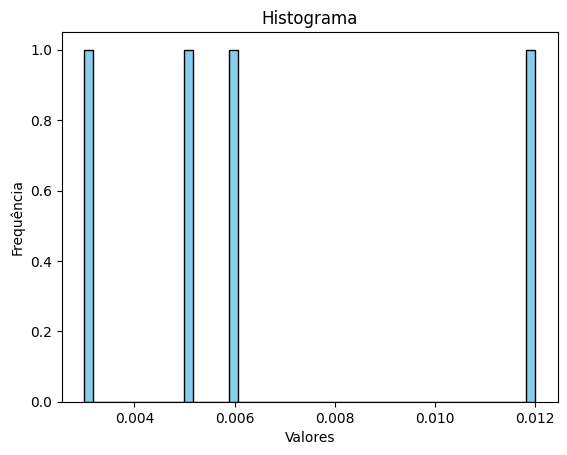

VAR_253


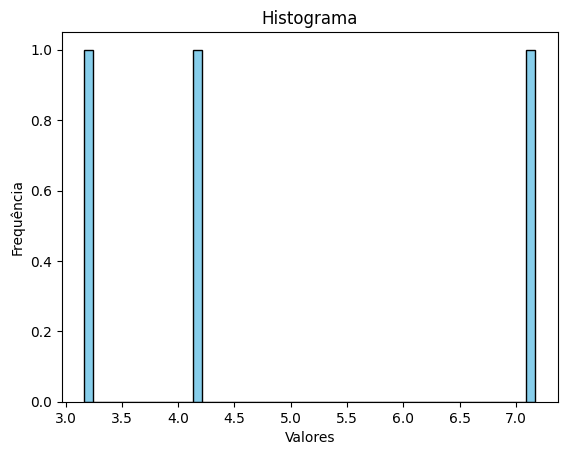

VAR_254


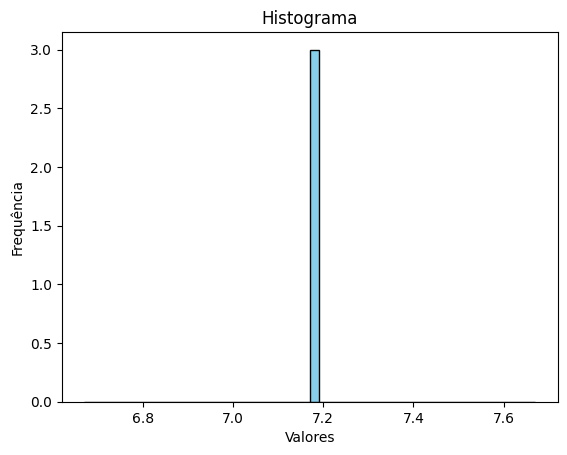

VAR_258


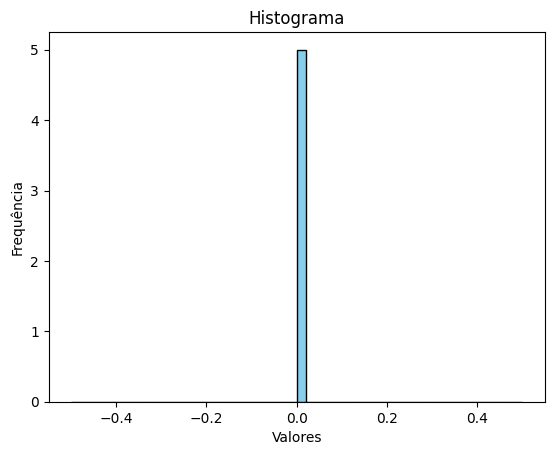

VAR_259


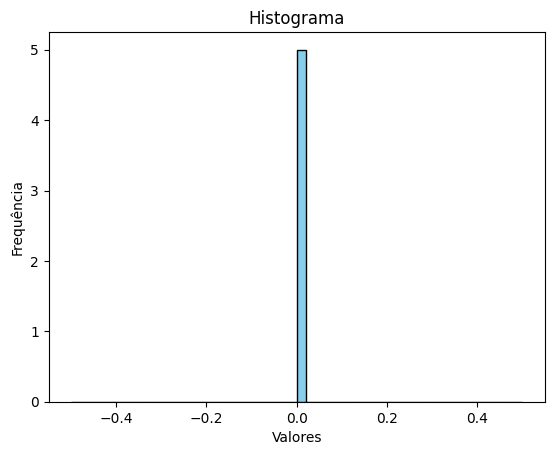

VAR_260


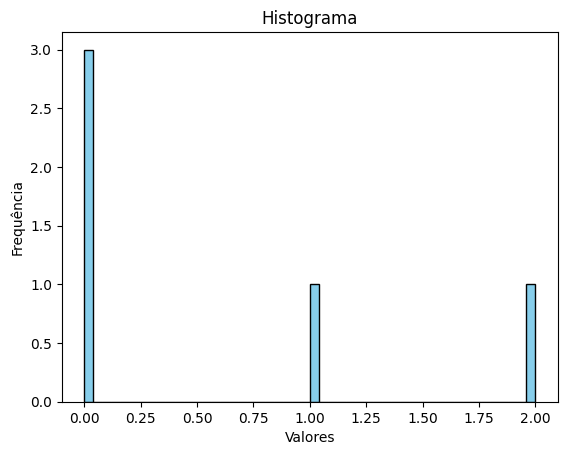

VAR_261


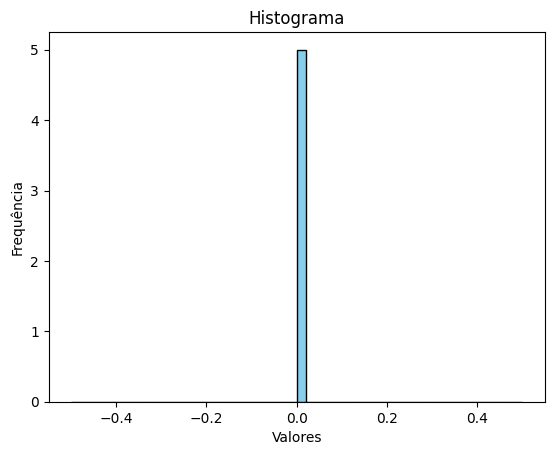

VAR_262


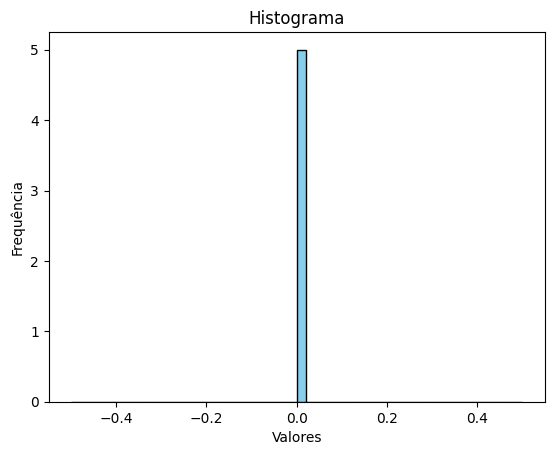

VAR_263


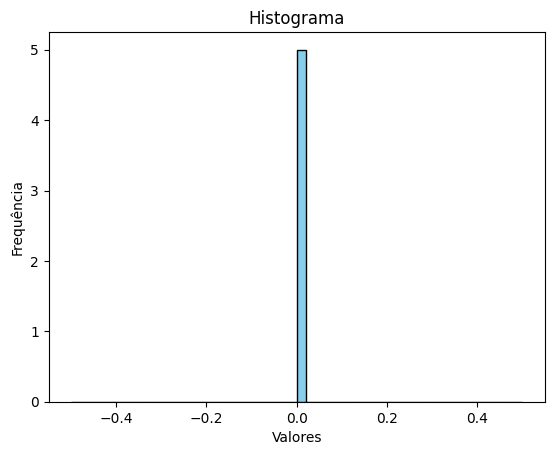

VAR_264


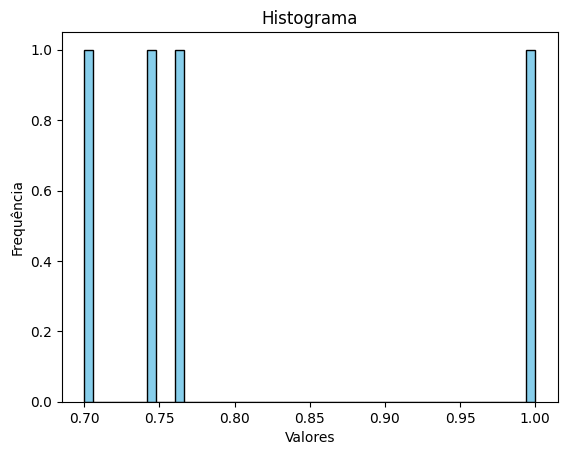

VAR_265


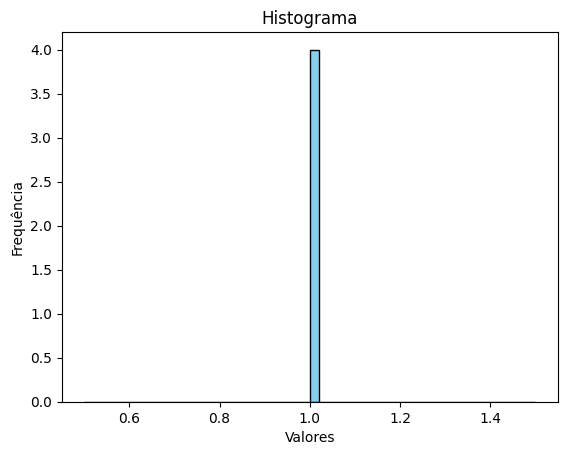

VAR_267


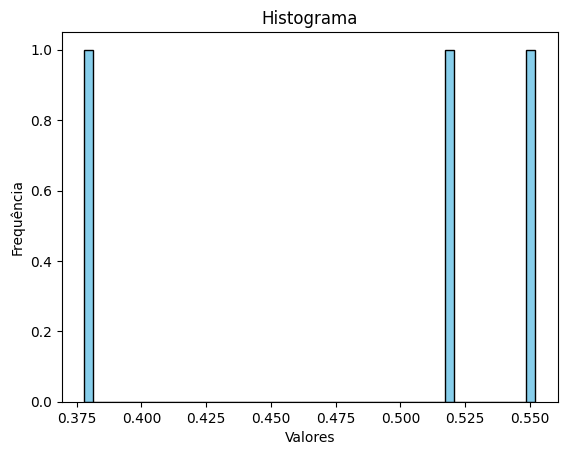

VAR_268


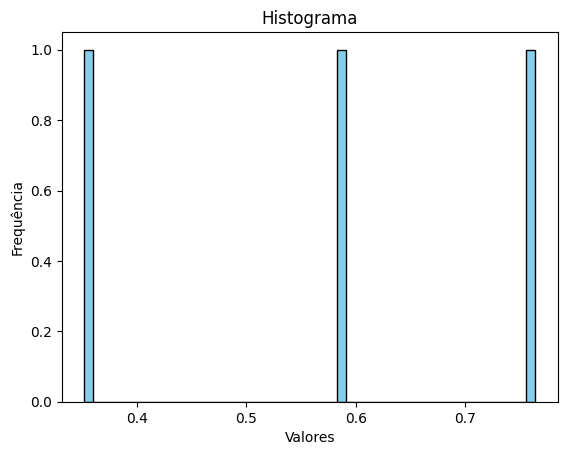

VAR_269


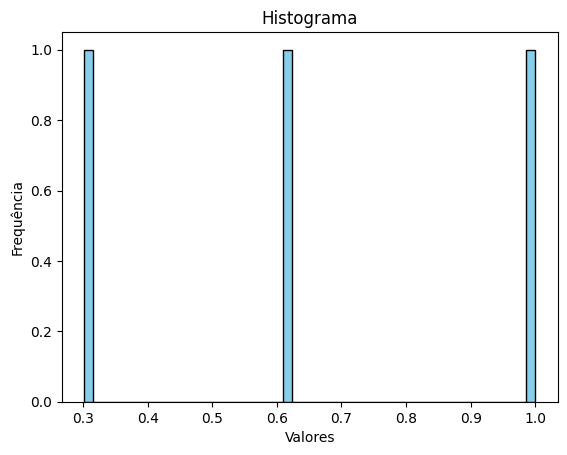

VAR_271


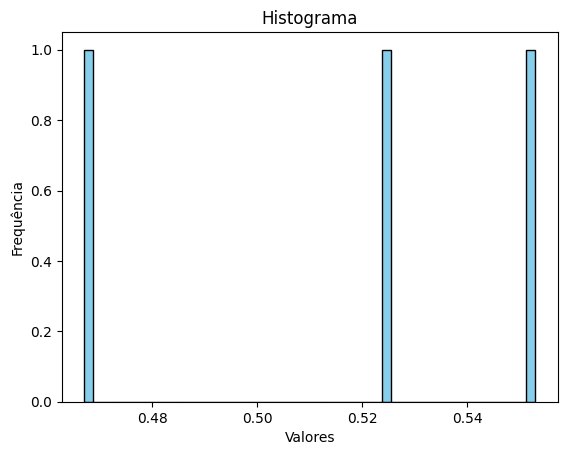

VAR_305


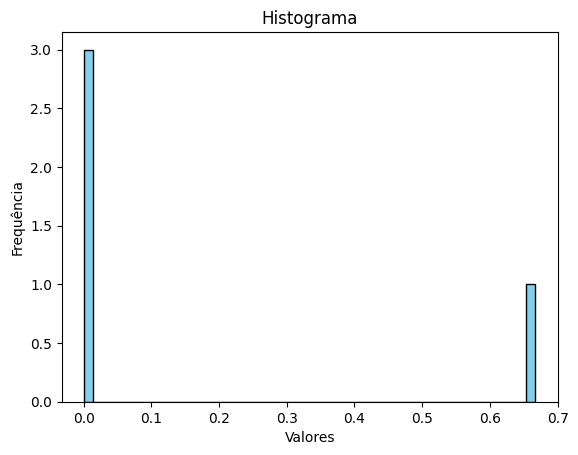

VAR_309


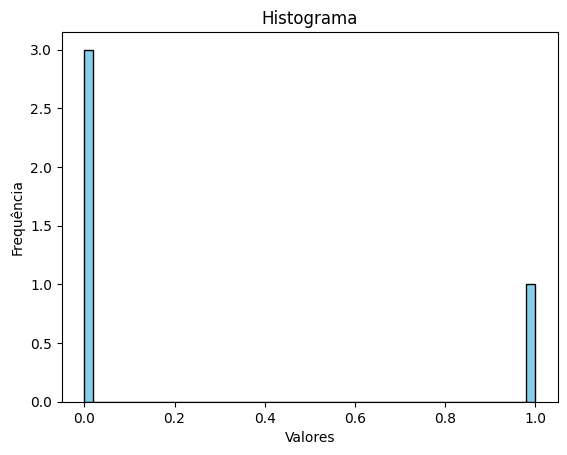

VAR_310


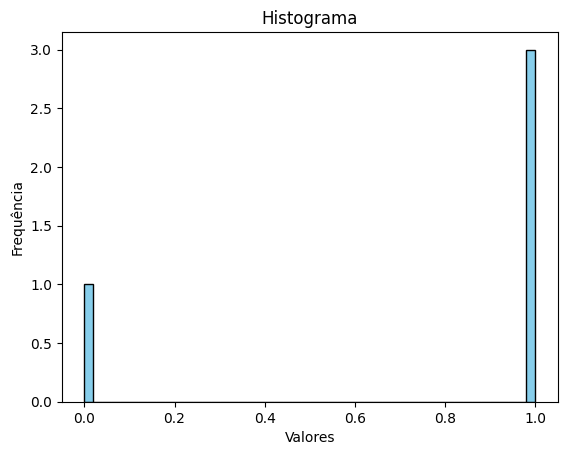

VAR_313


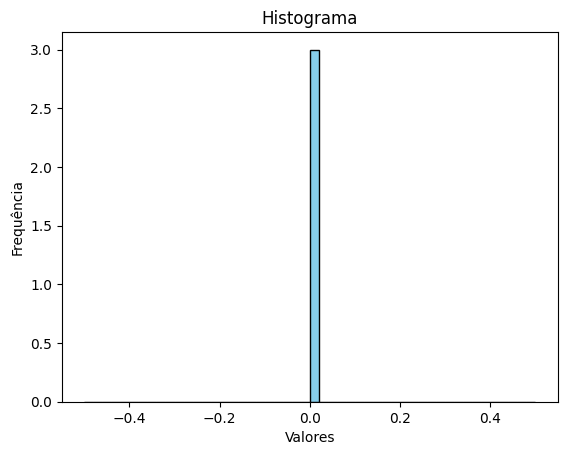

VAR_315


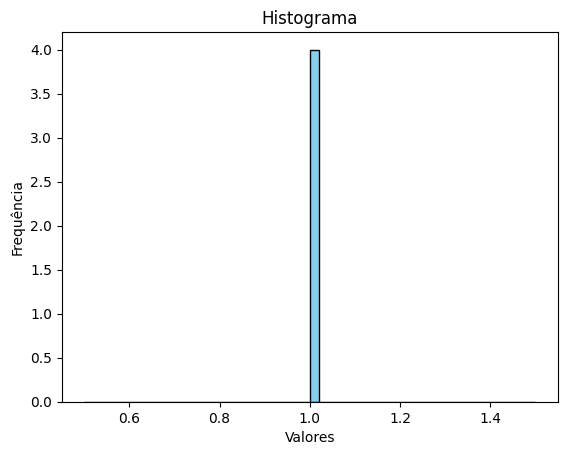

In [12]:
# Gráfico sem imputação dos dados faltantes

for i in num.columns:
    print(i)
    plot_histograma(i, num, label=None, bins=50)